# 신규 아파트 주차 수요 예측

<img src = "https://github.com/Jangrae/img/blob/master/parking.png?raw=true" width=800, align="left"/>

# 단계 2: 탐색적 데이터 분석

## [미션]

단계1 에서 생성한 데이터에 대해서 탐색적 분석을 수행합니다.

1) 단변량 분석
    - 숫자형, 범주형 변수에 맞게 데이터를 탐색하며 비즈니스적 의미를 파악합니다.
2) 이변량 분석
    - 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
    - 범주형 변수 → 실차량수 관계를 분석합니다.
3) 전처리(추가)
    - 범주형 변수 중에는 범줏값 개수가 적은 범주들은 유사한 범주끼리 묶어 봅니다.
    - 불필요한 변수를 제거합니다.

## 1. 환경설정

### (1) 로컬 수행(Anaconda)

- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [7]:
# 기본 경로
path = ''

### (2) 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [10]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### (3) 한글 폰트 표시용 라이브러리 설치

In [13]:
# 한글 표시를 위한 라이브러리 설치
# !pip install koreanize_matplotlib -q

### (4) 라이브러리 불러오기

In [15]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

### (5) 데이터 불러오기

- joblib.dump() 함수를 사용해 이전에 저장했던 base_data1.pkl 파일을 읽어옵니다.
- 읽어온 데이터를 apart 데이터프레임으로 선언합니다.

#### 1) 데이터 불러오기

In [18]:
# 파일 불러오기
apart = joblib.load(path+'base_data1.pkl')

#### 2) 기본 정보 조회

In [20]:
apart.head(5)

,단지코드,총세대수,지역,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,C0001,78,서울,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,C0002,35,서울,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,C0003,88,서울,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,C0004,477,서울,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,C0006,15,서울,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333


In [21]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 309 entries, 0 to 344
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   단지코드     309 non-null    object 
 1   총세대수     309 non-null    int64  
 2   지역       309 non-null    object 
 3   준공연도     309 non-null    int64  
 4   건물형태     309 non-null    object 
 5   난방방식     309 non-null    object 
 6   승강기설치여부  309 non-null    object 
 7   실차량수     309 non-null    int64  
 8   총면적      309 non-null    float64
 9   10-30    309 non-null    int64  
 10  30-40    309 non-null    int64  
 11  40-50    309 non-null    int64  
 12  50-60    309 non-null    int64  
 13  60-70    309 non-null    int64  
 14  70-80    309 non-null    int64  
 15  80-200   309 non-null    int64  
 16  임대보증금    309 non-null    float64
 17  임대료      309 non-null    float64
dtypes: float64(3), int64(10), object(5)
memory usage: 45.9+ KB


In [22]:
apart.dtypes

단지코드        object
총세대수         int64
지역          object
준공연도         int64
건물형태        object
난방방식        object
승강기설치여부     object
실차량수         int64
총면적        float64
10-30        int64
30-40        int64
40-50        int64
50-60        int64
60-70        int64
70-80        int64
80-200       int64
임대보증금      float64
임대료        float64
dtype: object

## 2. 기본 분석

- 기술통계정보, 결측치 확인 등 기본 분석을 수행합니다.

In [24]:
apart.isna().sum()

단지코드       0
총세대수       0
지역         0
준공연도       0
건물형태       0
난방방식       0
승강기설치여부    0
실차량수       0
총면적        0
10-30      0
30-40      0
40-50      0
50-60      0
60-70      0
70-80      0
80-200     0
임대보증금      0
임대료        0
dtype: int64

In [25]:
apart.describe()

,총세대수,준공연도,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,3.090000e+02,309.000000
mean,597.174757,2007.689320,555.851133,40008.144564,51.177994,188.864078,163.216828,148.087379,1.967638,17.252427,27.032362,2.660337e+07,220765.444410
std,425.636088,7.596174,375.616295,29220.882315,169.483490,227.798857,222.032878,263.115232,34.587912,78.915422,107.537304,2.213743e+07,151818.543196
min,1.000000,1992.000000,21.000000,68.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.205000e+06,39920.000000
25%,266.000000,2002.000000,258.000000,17861.920000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.466833e+07,134192.500000
50%,533.000000,2008.000000,495.000000,36521.362000,0.000000,116.000000,40.000000,0.000000,0.000000,0.000000,0.000000,2.050100e+07,180920.000000
75%,871.000000,2014.000000,814.000000,57951.515900,0.000000,316.000000,296.000000,180.000000,0.000000,0.000000,0.000000,3.067120e+07,239860.000000
max,2289.000000,2022.000000,1657.000000,150126.863200,1181.000000,1429.000000,1258.000000,1444.000000,608.000000,756.000000,850.000000,1.898219e+08,950305.000000


## 3. 단변량 분석

- 주요 변수들을 연속형, 범주형으로 구분하여 데이터 분포를 살펴보며 비즈니스적인 의미를 파악합니다.
    - 연속형: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
    - 범주형: '지역', '건물형태', '난방방식', '승강기설치여부'
- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제한 후 분석합니다.

### (1) 연속형 변수

- 대상: '실차량수', '총세대수', '총면적', '준공연도', '임대료', '임대보증금'
- 기술통계, Histogram, Boxplot 등을 사용해 데이터 분포를 파악합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [38]:
# 함수 만들기
def eda_num(num_cols, data):
    print('<<Numerical cols>>\n')
    print('=' * 80)
    for i in range(len(num_cols)):
        print(data[[num_cols[i]]].describe().T)
        print()
    print('=' * 80)
    
    plt.figure(figsize = (21, 21))
    for i in range(len(num_cols)):
        plt.subplot(6, 2, (2 * i) + 1)
        sns.histplot(x = num_cols[i], data = data, kde = True)
        plt.subplot(6, 2, (2 * i) + 2)
        sns.boxplot(x = num_cols[i], data = data)
    plt.show()

#### 1) 실차량수

<<Numerical cols>>

      count        mean         std   min    25%    50%    75%     max
실차량수  345.0  555.431884  374.640474  21.0  258.0  498.0  822.0  1657.0



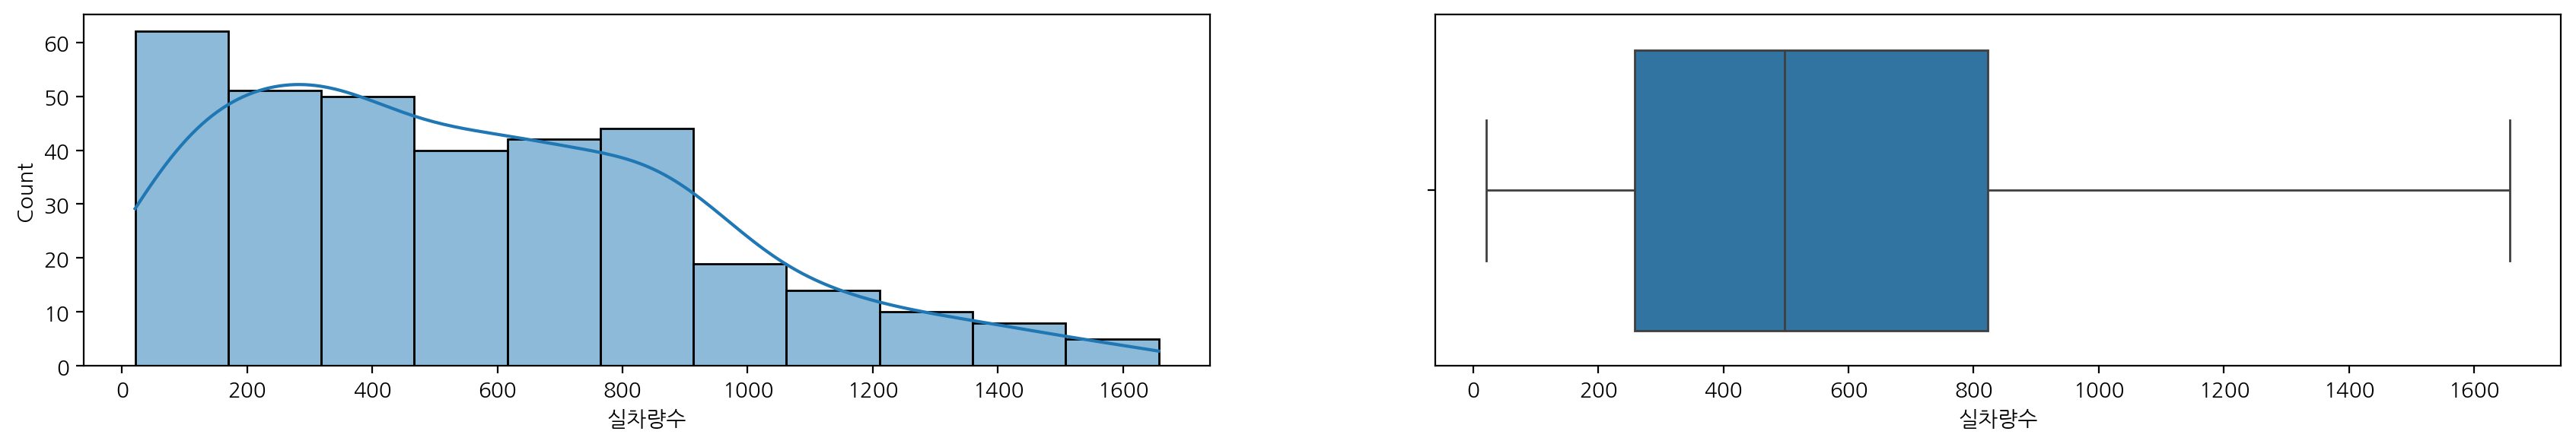

In [51]:
eda_num(['실차량수'],apart)
# 그래프의 비대칭성 = 실차량수가 커질수록 빈도수가 낮아진다. 
# 즉, 실차량수가 상대적으로 적은 곳이 더 많다.

#### 2) 총세대수

<<Numerical cols>>

      count       mean         std  min    25%    50%    75%     max
총세대수  345.0  546.75942  432.359538  1.0  178.0  491.0  853.0  2289.0



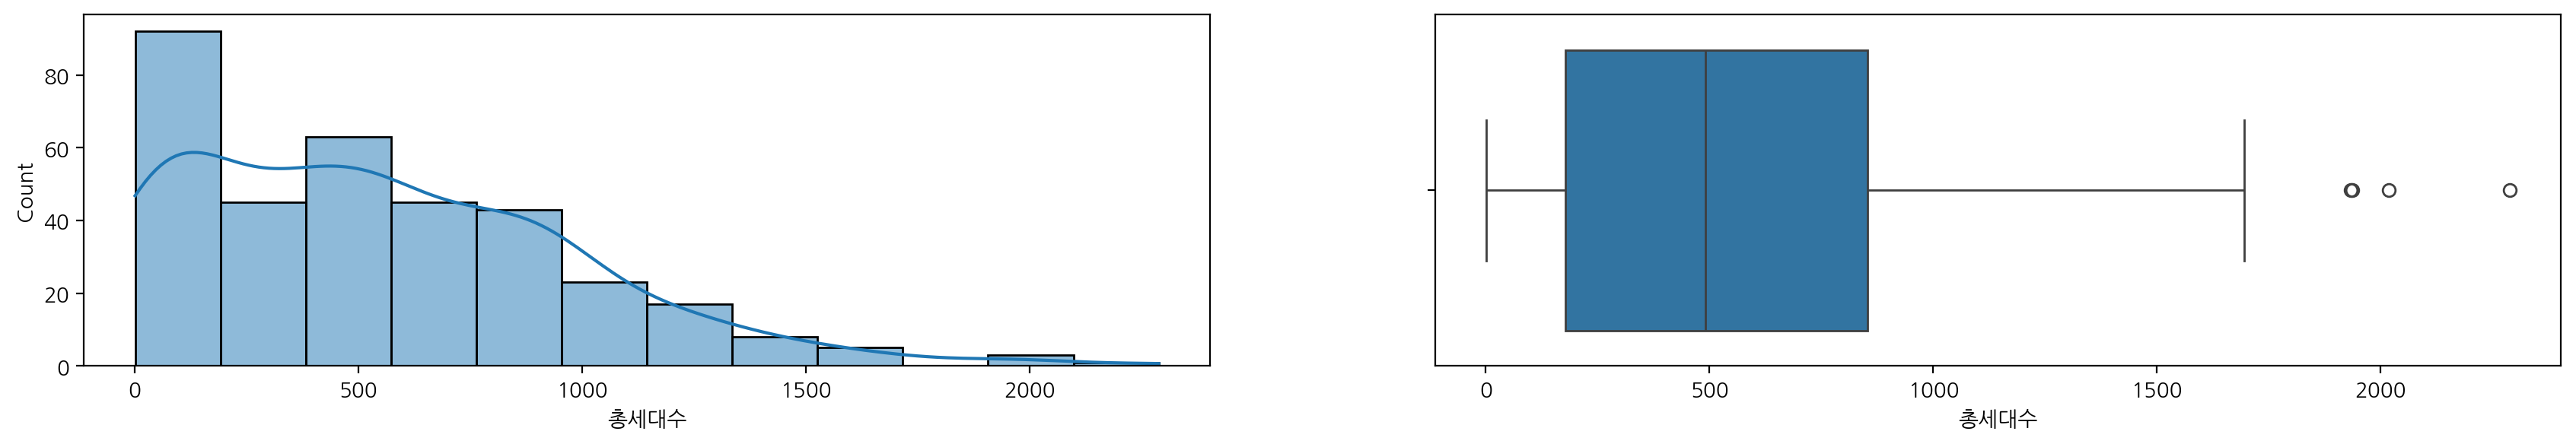

In [54]:
eda_num(['총세대수'],apart)
# 그래프의 비대칭성 = 총세대수가 커질수록 빈도수가 낮아진다. 
# 즉, 총세대수가 상대적으로 적은 곳이 더 많다.
# 또한 BoxPlot에서 몇 개의 이상치가 발견되는 것으로 보아, 드물게 매우 큰 세대수를 가진 단지가 존재한다.
# 추가적으로 실차량수와 비례관계가 나타나는 것으로 추정된다.

#### 3) 총면적

<<Numerical cols>>

     count          mean           std    min         25%       50%  \
총면적  345.0  37282.661962  29588.197927  68.93  11293.8321  32190.36   

            75%          max  
총면적  56189.9796  150126.8632  



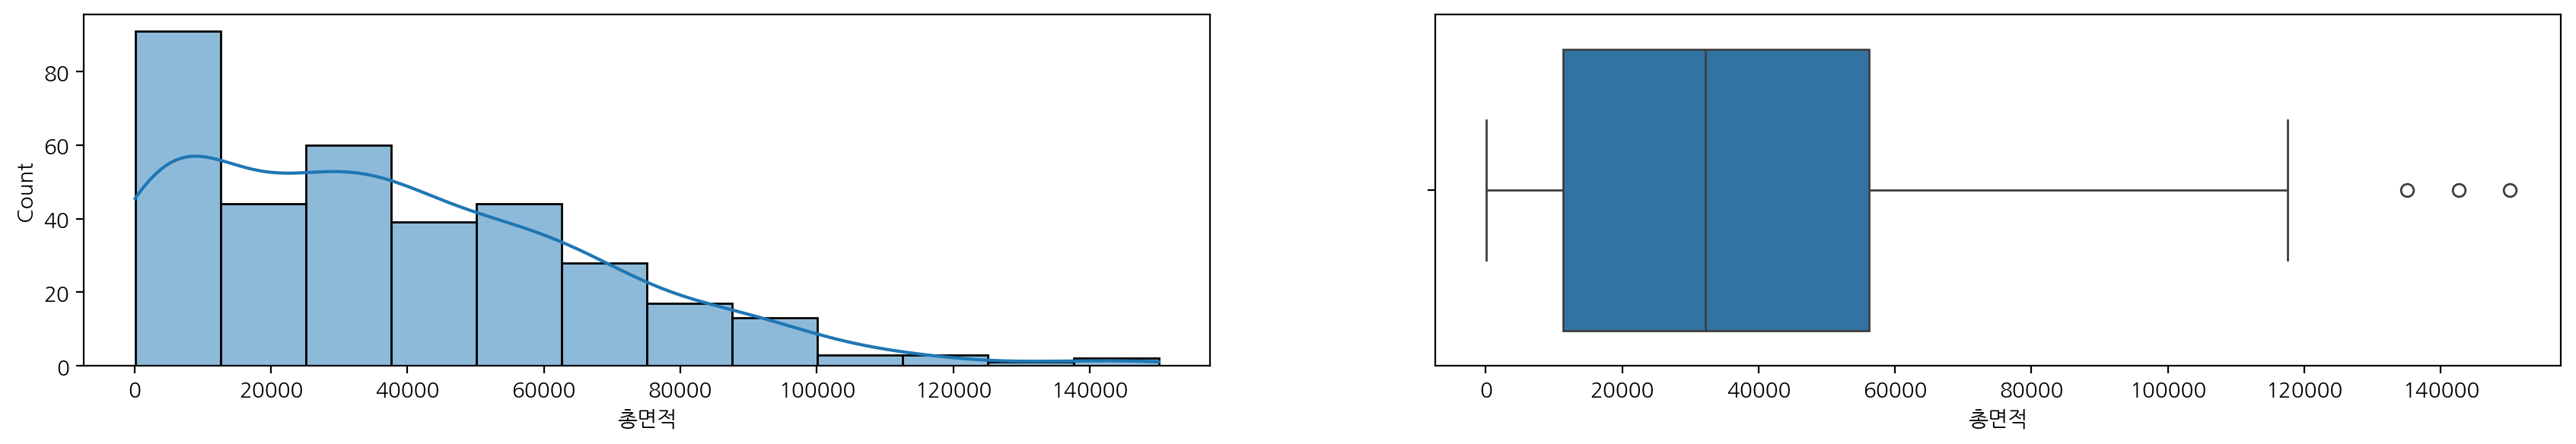

In [56]:
eda_num(['총면적'],apart)
# 총세대수 데이터 분석과 동일한 결과가 보인다.

#### 4) 준공연도

<<Numerical cols>>

      count         mean       std     min     25%     50%     75%     max
준공연도  345.0  2007.713043  7.261036  1992.0  2003.0  2008.0  2013.0  2022.0



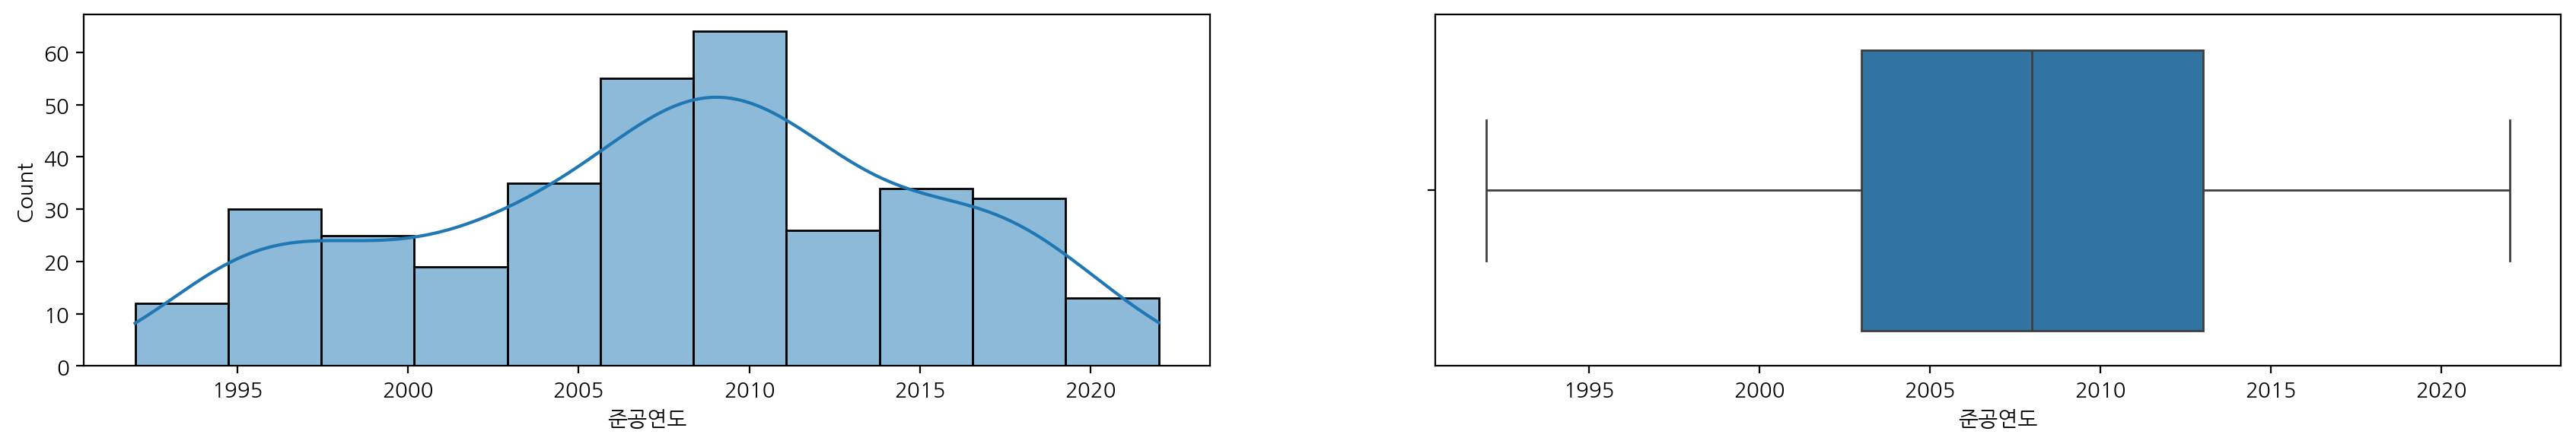

In [58]:
eda_num(['준공연도'],apart)
# 2011년도까지 단지 준공 수가 증가하는 추세가 보인다.
# 하지만 그 이후 점점 줄어드는 추세가 보인다.
# 부동산 관련 자료 분석 필요
# https://blog.naver.com/realme0603/221451082132 -> 정리 필요

#### 5) 임대료

<<Numerical cols>>

     count          mean            std  min       25%       50%       75%  \
임대료  345.0  197729.05021  158760.777669  0.0  112905.0  172000.0  227564.0   

          max  
임대료  950305.0  



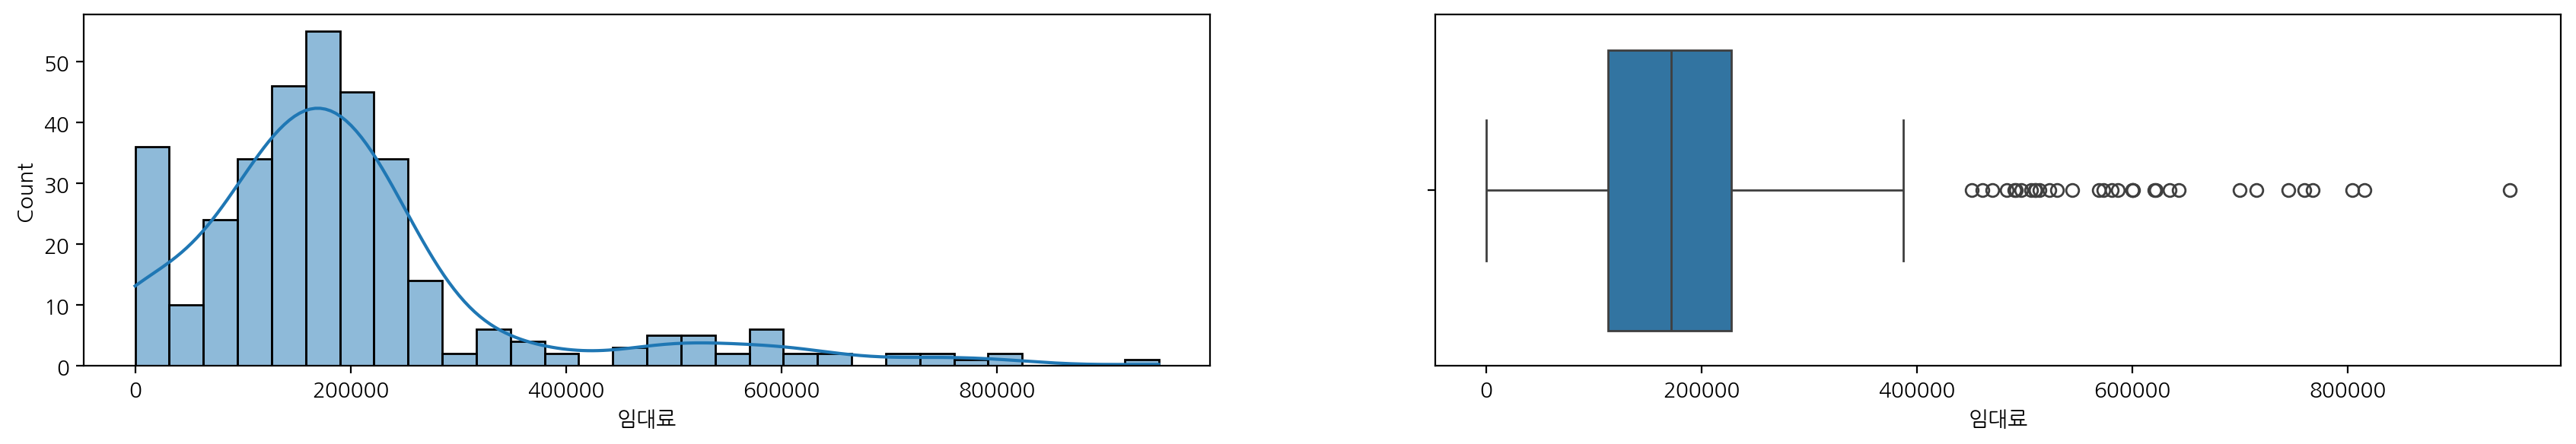

In [60]:
eda_num(['임대료'],apart)
# 임대료가 0인 값
# -> 특정 조건 충족시 지원 정책으로 임대료 감면 또는 면제
# -> 정책적 이유로 임대료가 명시되지 않는 경우, 실제로 임대료는 있지만 행정적이유로 반영되지 않았을 가능성
# -> 데이터가 유효하다고 판단하여 전처리 과정에서 제거하지 않음

#### 6) 임대보증금

<<Numerical cols>>

       count          mean           std  min           25%         50%  \
임대보증금  345.0  2.382737e+07  2.247481e+07  0.0  1.272491e+07  19308500.0   

              75%           max  
임대보증금  28377000.0  1.898219e+08  



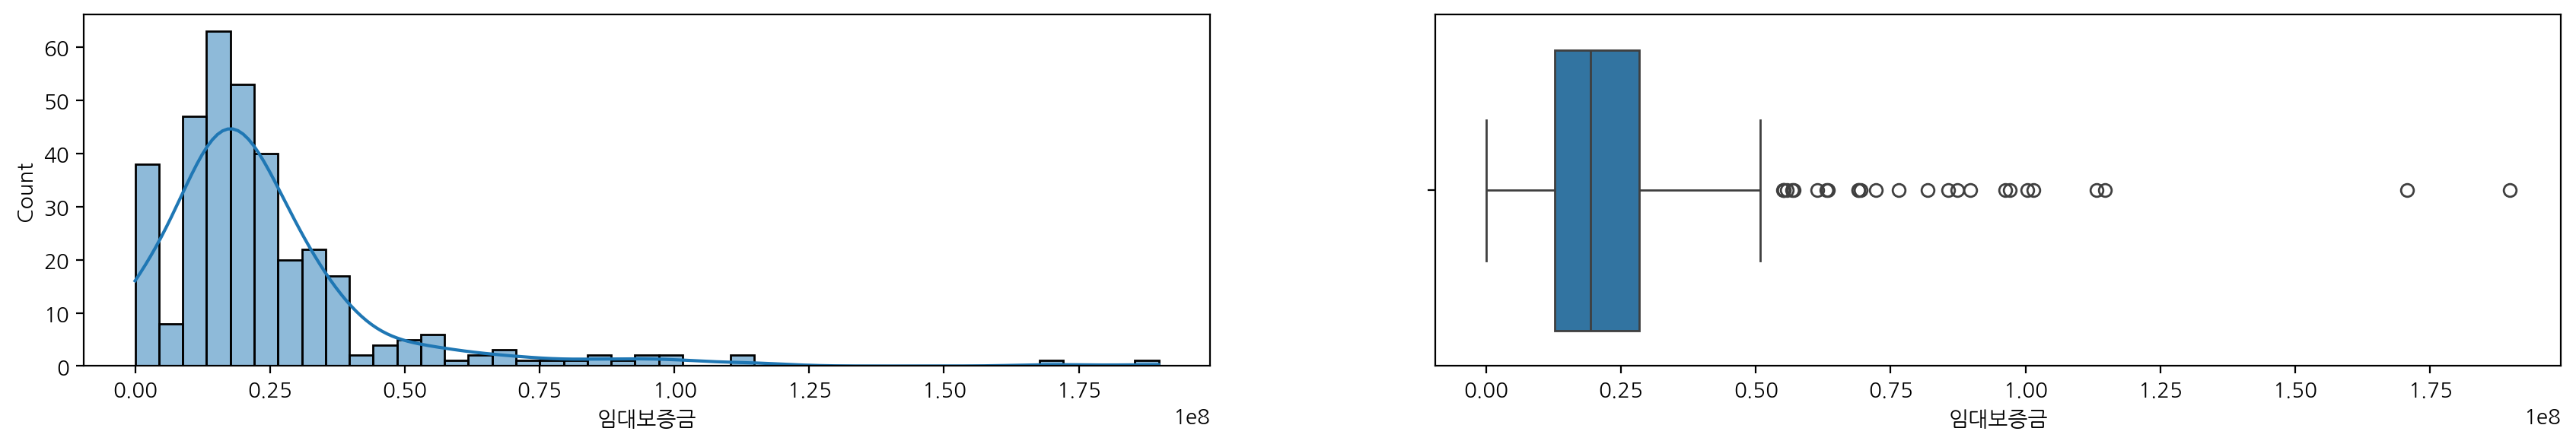

In [62]:
eda_num(['임대보증금'],apart)
# 임대료가 0인 데이터는 임대보증금 또한 0이므로 임대료 분석과 동일

In [167]:
# 임대료,임대보증금 분석
apart = joblib.load(path+'base_data1.pkl')
rent_mean = apart.groupby('지역')['임대료'].mean().reset_index()
deposit_mean = apart.groupby('지역')['임대보증금'].mean().reset_index()
count = apart['지역'].value_counts().reset_index()
count.columns = ['지역', '데이터 개수']
result = pd.merge(rent_mean, deposit_mean, on='지역')
result = pd.merge(result, count, on='지역')
result = result.sort_values(by='임대료').reset_index(drop=True)
result

# 지역별 임대료 및 임대보증금의 차이가 큰 것을 확인. 또한 지역별 데이터 개수 차이도 큼 -> 분포 자체가 복잡하여 이상값이 나올 수 있음

,지역,임대료,임대보증금,데이터 개수
0,제주,113683.333333,1.029283e+07,3
1,대구경북,133186.194768,1.579771e+07,67
2,전북,136710.238095,1.285123e+07,7
3,광주전남,144547.492945,1.970462e+07,54
4,대전충남,158524.472958,1.793220e+07,26
5,충북,184856.666667,1.666988e+07,7
6,경남,189259.656863,1.796503e+07,17
7,부산울산,202079.045788,2.121372e+07,39
8,세종,207706.666667,2.020633e+07,2
9,강원,237264.629630,1.909645e+07,9


### (2) 범주형 변수

- 대상: '지역', '건물형태', '난방방식', '승강기설치여부'
- sns.countplot() 함수 등을 사용해 데이터 분포를 확인합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [64]:
# 함수 만들기
import matplotlib.pyplot as plt
def plot_data_2(series, title="Data Plot", xlabel="X-axis", ylabel="Y-axis"):
    plt.figure(figsize=(10, 6))
    sns.countplot(series)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

#### 1) 지역

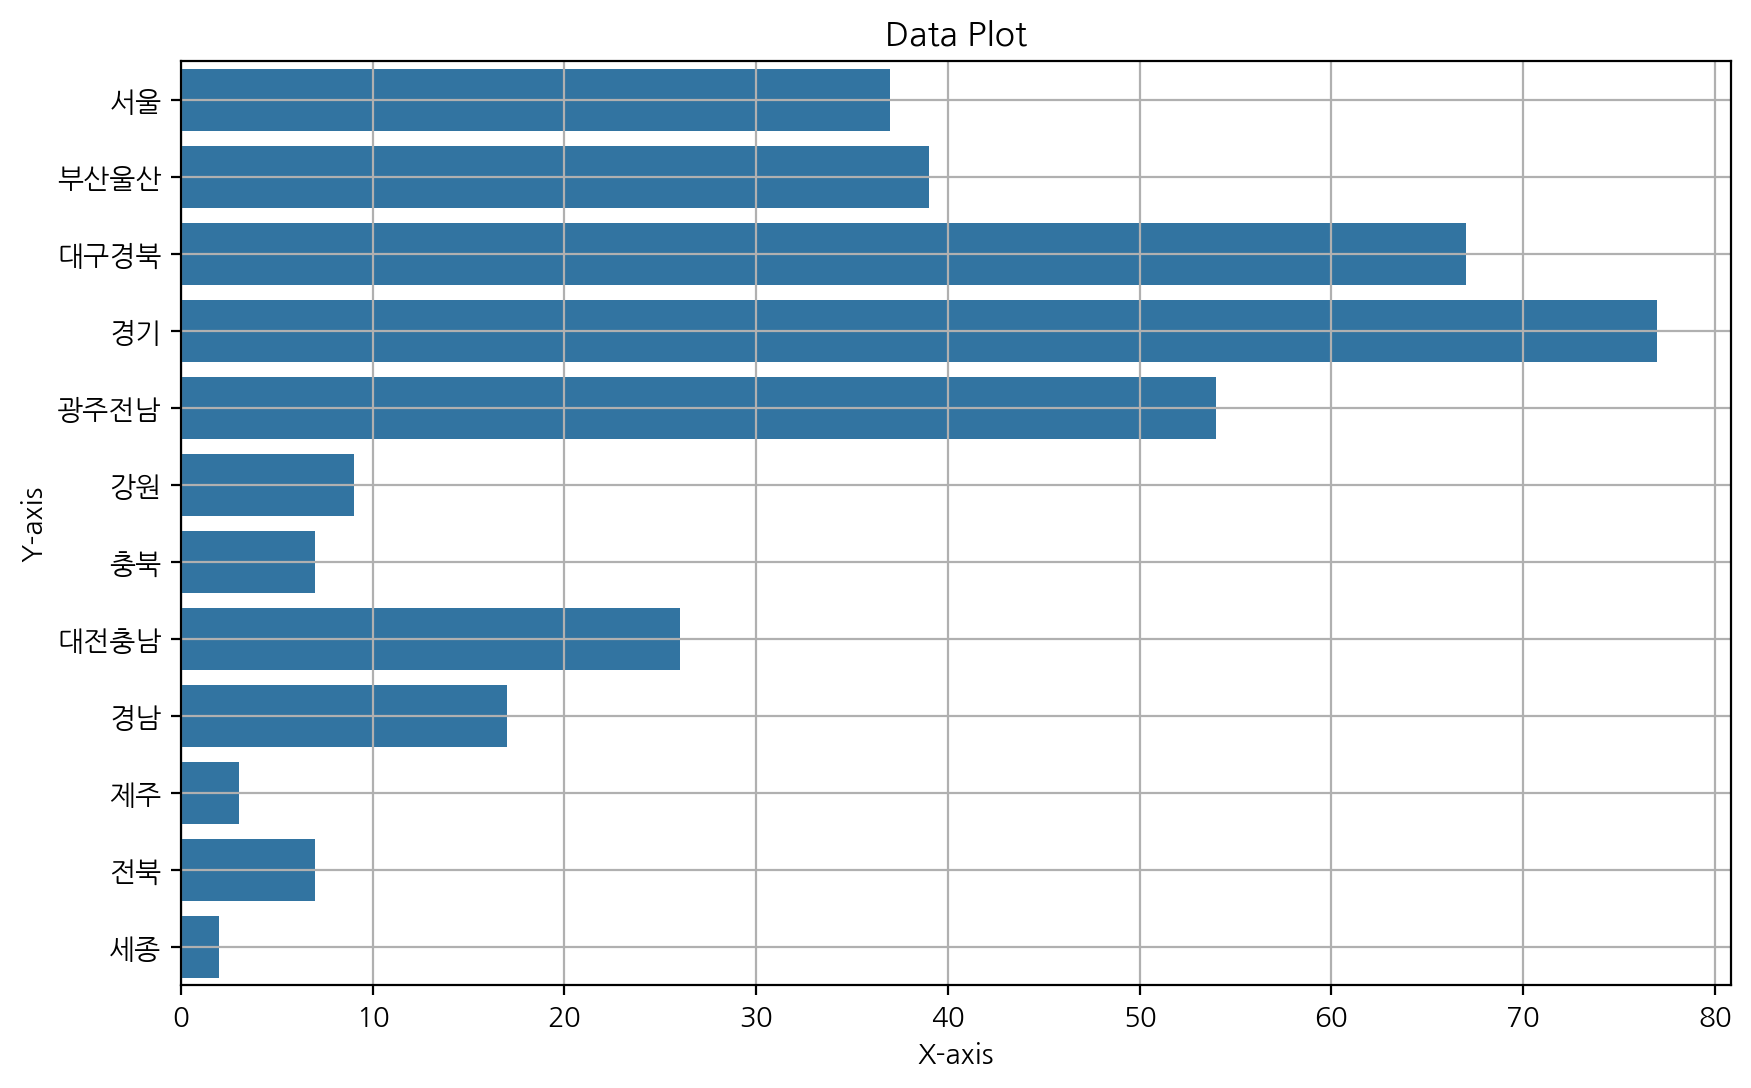

In [67]:
plot_data_2(apart['지역'])
# 준공 수가 많은 지역은 재개발 또는 신도시가 다수 있다는 것을 추정

#### 2) 건물형태

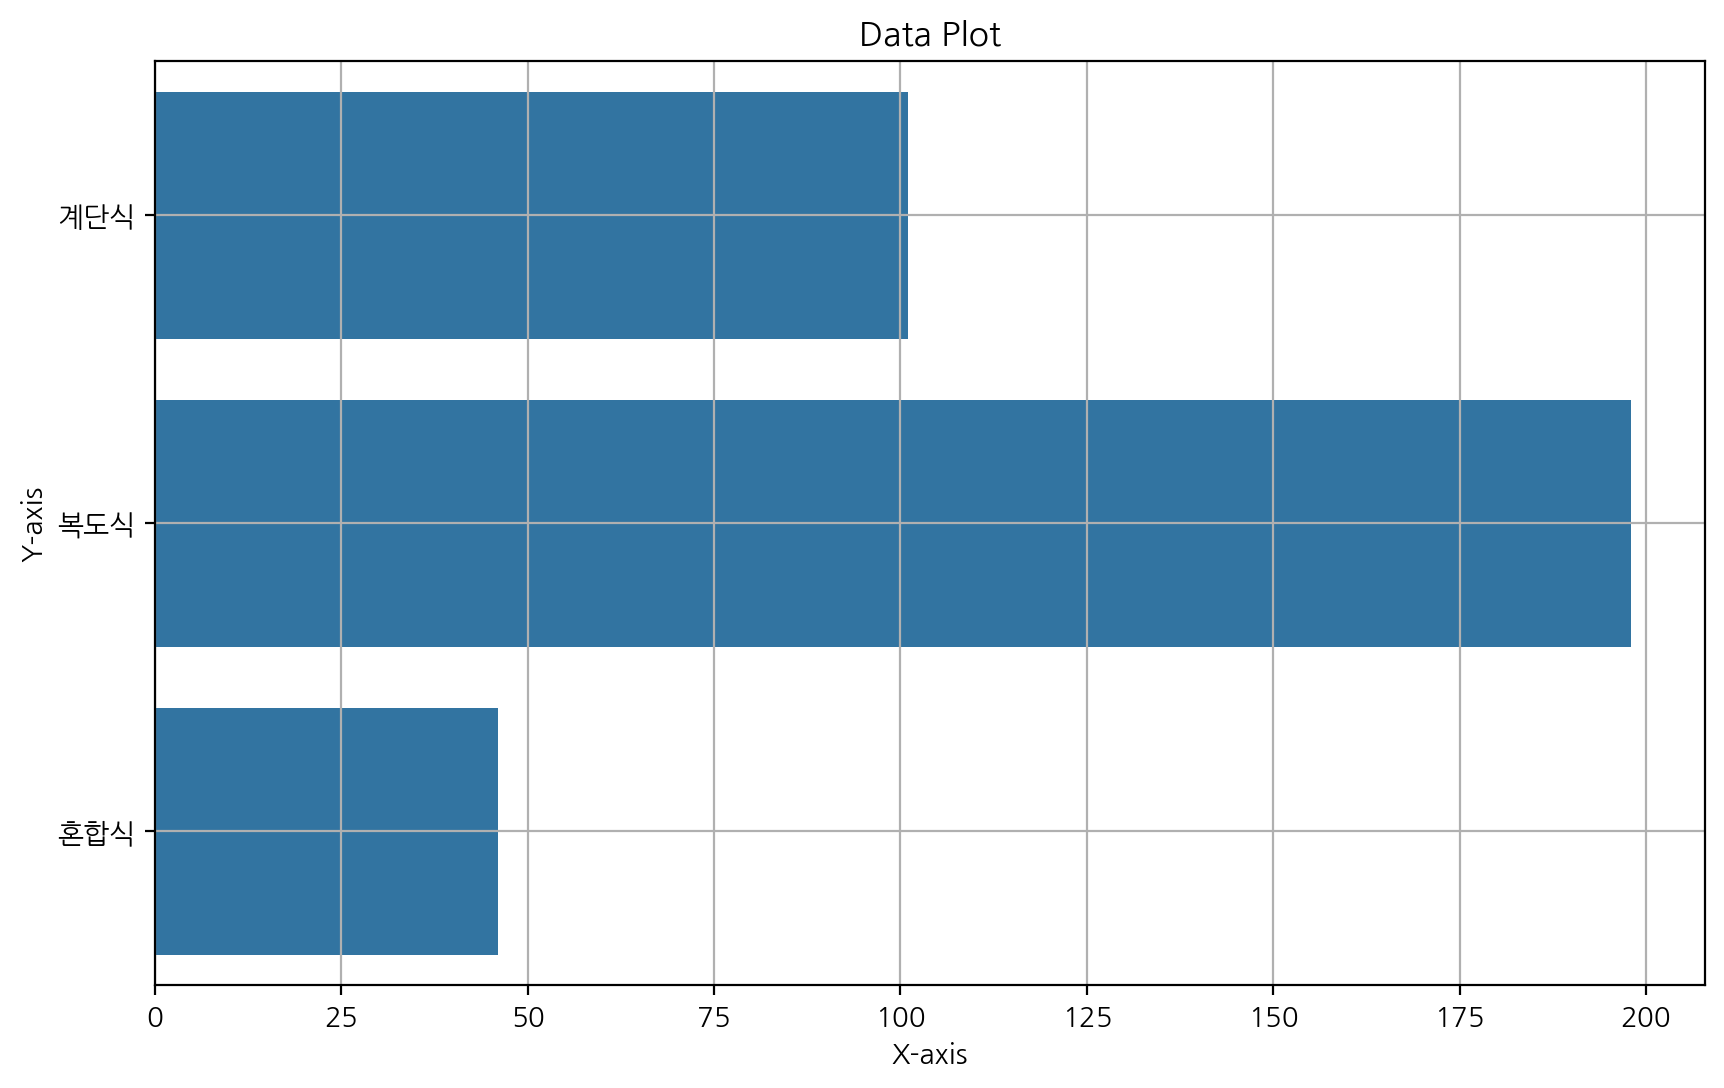

In [70]:
plot_data_2(apart['건물형태'])
# 복도식: 공간활용도가 높아 관리비가 상대적 저렴. 하지만 프라이버시 부족 및 소음 문제
# 계단식: 프라이버시 확보와 소음 차단. 하지만 공용 복도가 없어 관리 비용 증가

# 저렴한 가격에 많은 집을 제공하기 위해 복도식을 더 선호 추정

#### 3) 난방방식

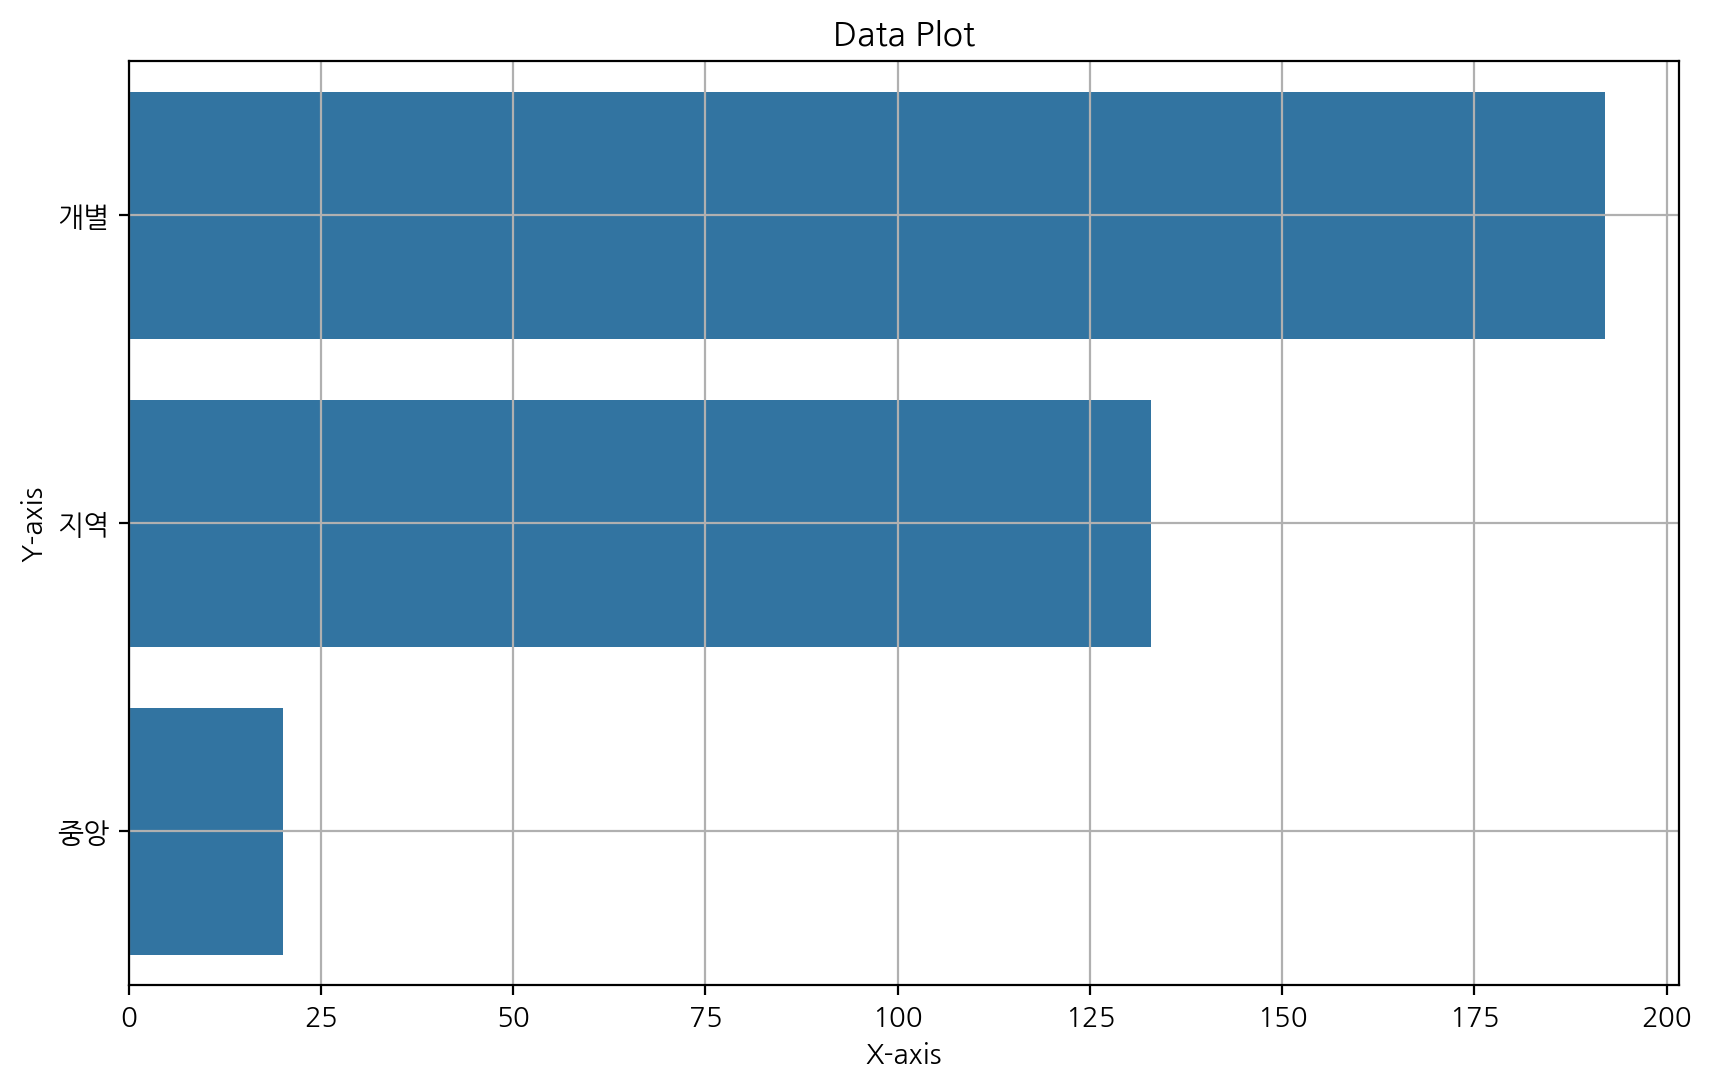

In [89]:
plot_data_2(apart['난방방식'])
# 개별이 편리성이 높아 개별을 선호하는 것으로 추정
# 개별 난방이 입주민 경제력이 더 높을 수 있다라고 추정

#### 4) 승강기설치여부

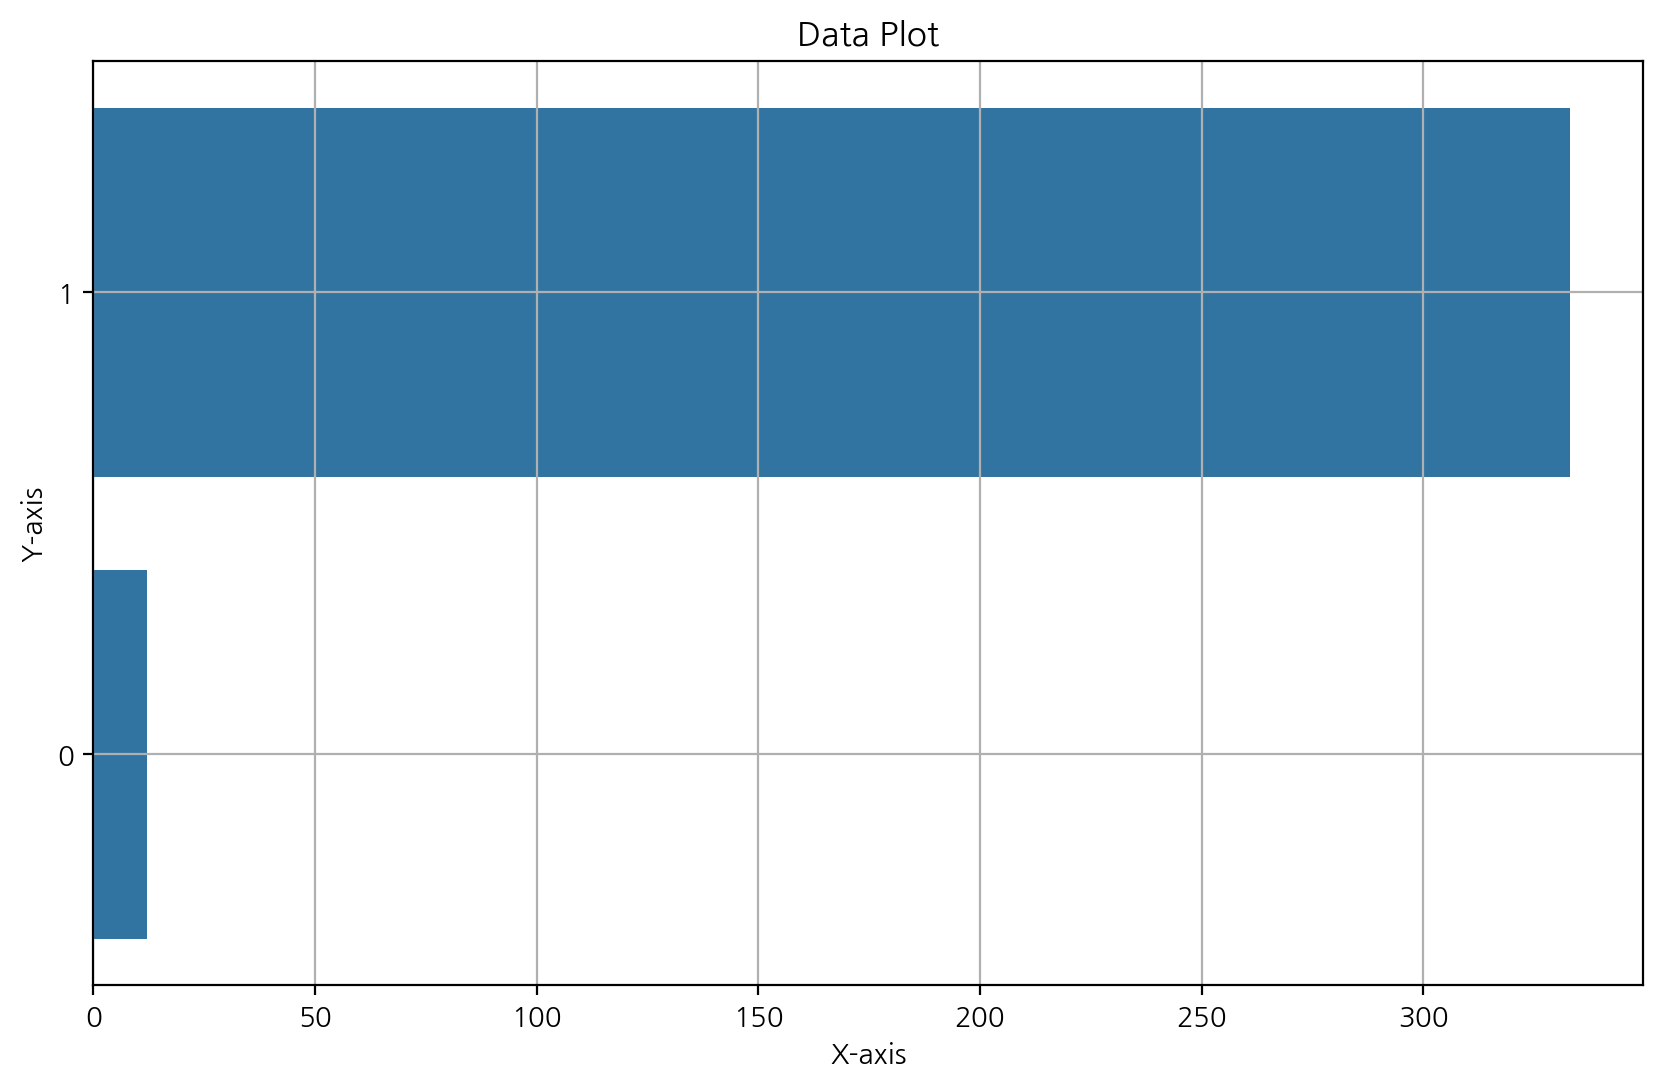

In [87]:
plot_data_2(apart['승강기설치여부'])
# 대부분 승강기가 설치 되어 있음
# 승강기가 설치되지 않는 곳은 세대 수가 적은 빌라이거나 층 수가 낮은 것으로 추정
# 층수가 높으면 세대 수가 많고 차량수도 많을 것이다. = 실차량수와 높은 연관이 있을 것으로 추정

#### 5) 전용면적구간

- 전용면적구간은 pd.melt() 함수를 사용해 pivot을 해제하여 전용면적구간별 세대수를 분석합니다.

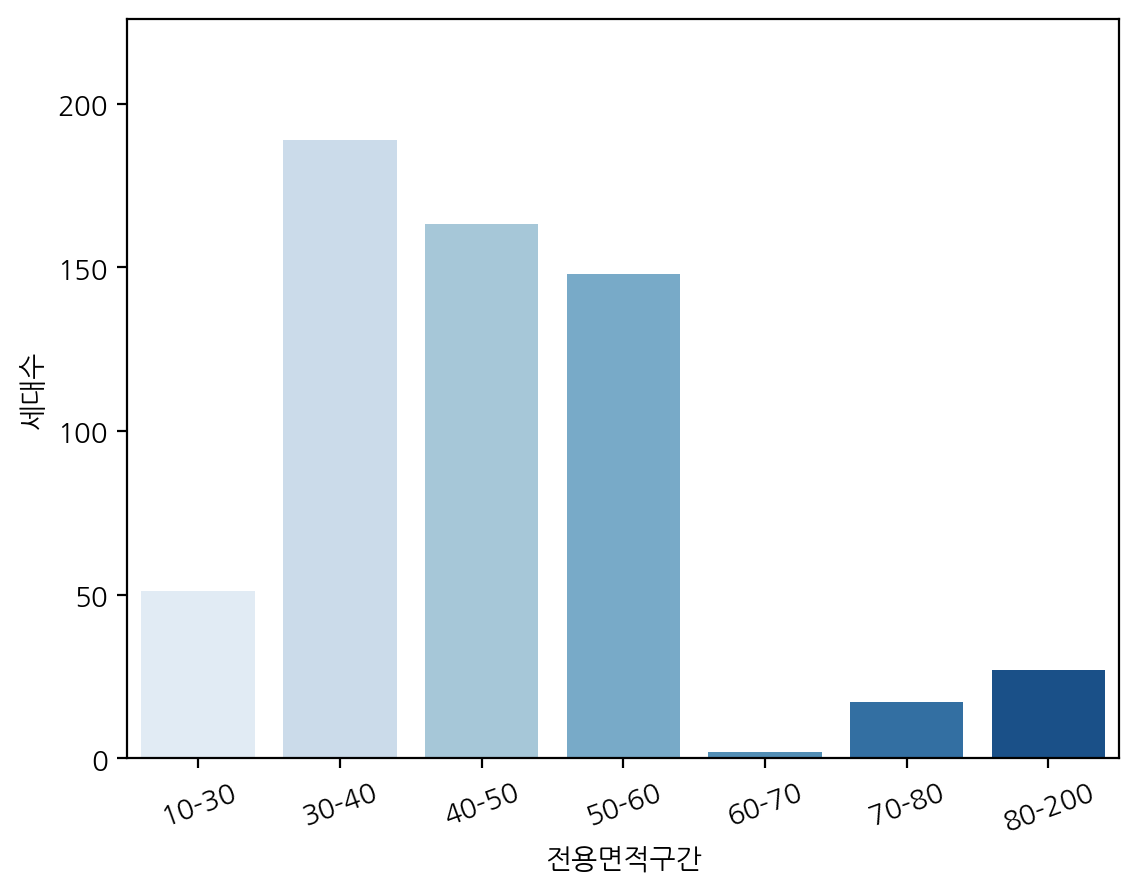

In [43]:
temp = apart.melt(id_vars='단지코드', value_vars=['10-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-200'], var_name='전용면적구간', value_name='세대수')
temp = pd.DataFrame(temp)
temp.reset_index(inplace=True)

sns.barplot(x=temp['전용면적구간'], y=temp['세대수'], data=temp, palette='Blues', errwidth=0)
plt.xticks(rotation=20)
plt.xlabel('전용면적구간')
plt.ylabel('세대수')
plt.show()
# 60이하가 많은 것을 확인할 수 있다.

## 4. 이변량 분석

- 숫자형 변수들 간의 상관관계를 분석합니다.
- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 볌주형 변수 → 실차량수 관계를 분석합니다.

### (1) 숫자형 변수들 간의 상관관계

- 숫자형 변수 → 실차량수 상관관계를 분석합니다.    
- 숫자형 변수들 간의 상관관계를 df.corr() 메서드와 sns.heatmap() 함수 등을 사용해 시각화 합니다.

<Axes: >

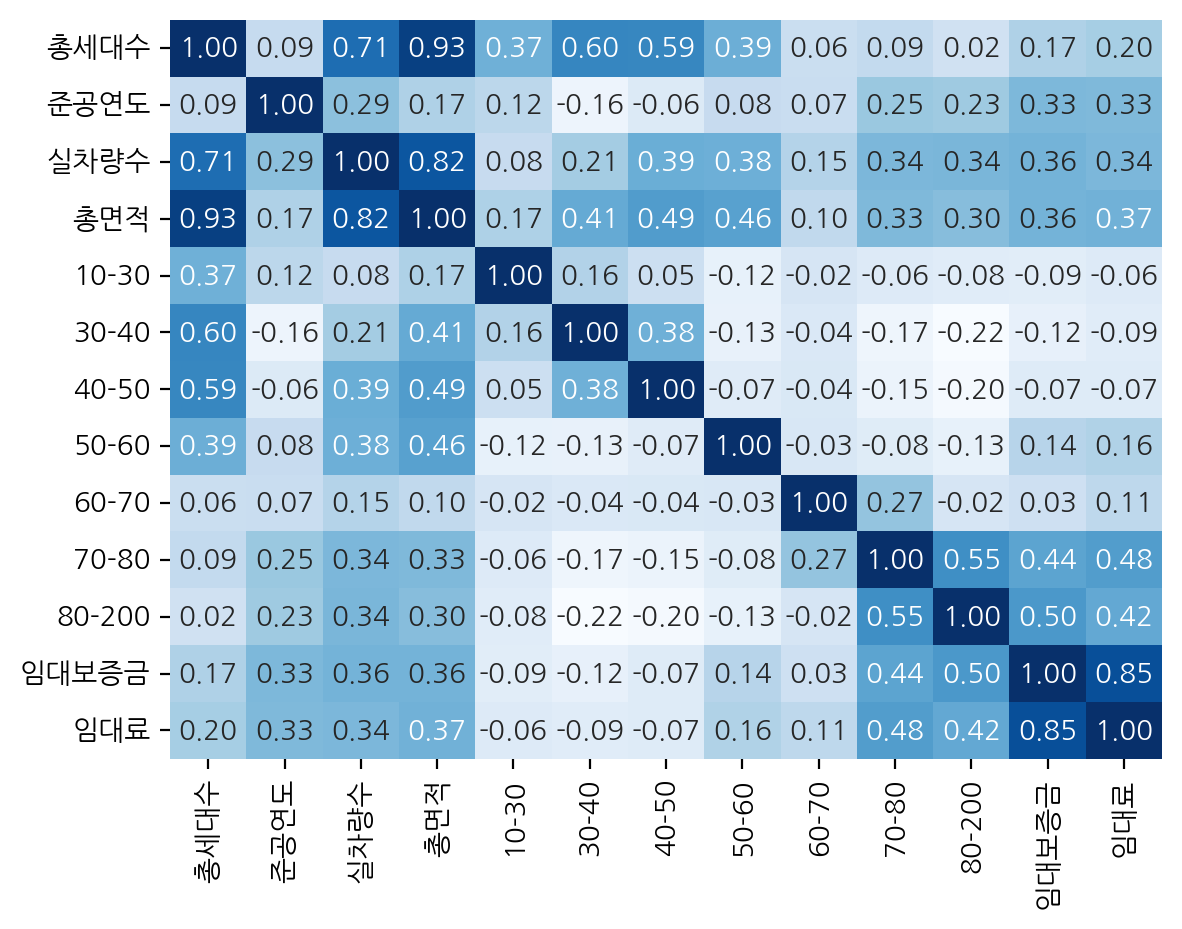

In [370]:
sns.heatmap(apart.corr(numeric_only=True),annot=True,fmt='0.2f',cmap='Blues',cbar=False)

# 아래 순서대로 실차량수와 상관계수가 높게 나타남 
#['총면적' '총세대수' '40-50' '50-60' '임대보증금' '80-200' '70-80' '임대료' '준공연도', '30-40' '60-70' '10-30']

### (2) 숫자형 변수 → 실차량수

- 상관계수가 높은 상위 3~5개 숫자형 변수와 실차량수 관계를 산점도를 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [93]:
# 실차량수와 상관계수 높은 순으로 피처 정렬
corr_list=apart.corr(numeric_only=True)['실차량수'].sort_values(ascending=False)[1:].reset_index()['index'].values
print(corr_list)

['총면적' '총세대수' '40-50' '50-60' '임대보증금' '80-200' '70-80' '임대료' '준공연도'
 '30-40' '60-70' '10-30']


In [115]:
# 함수 만들기
from scipy.stats import pearsonr
def plot_data_3(data, x, y):
    corr, p_value = pearsonr(data[x], data[y])
    plt.figure(figsize=(15, 5))
    sns.regplot(x=data[x], y=data[y], ci=95,line_kws={'color': 'red'})
    plt.xlabel('실차량수')
    plt.ylabel(y)
    plt.title(f'실차량수와 {y}의 산점도 (상관계수: {corr:.2f}, p-value: {p_value:.2e})')
    plt.show()
    return corr, p_value

#### 1) 변수이름

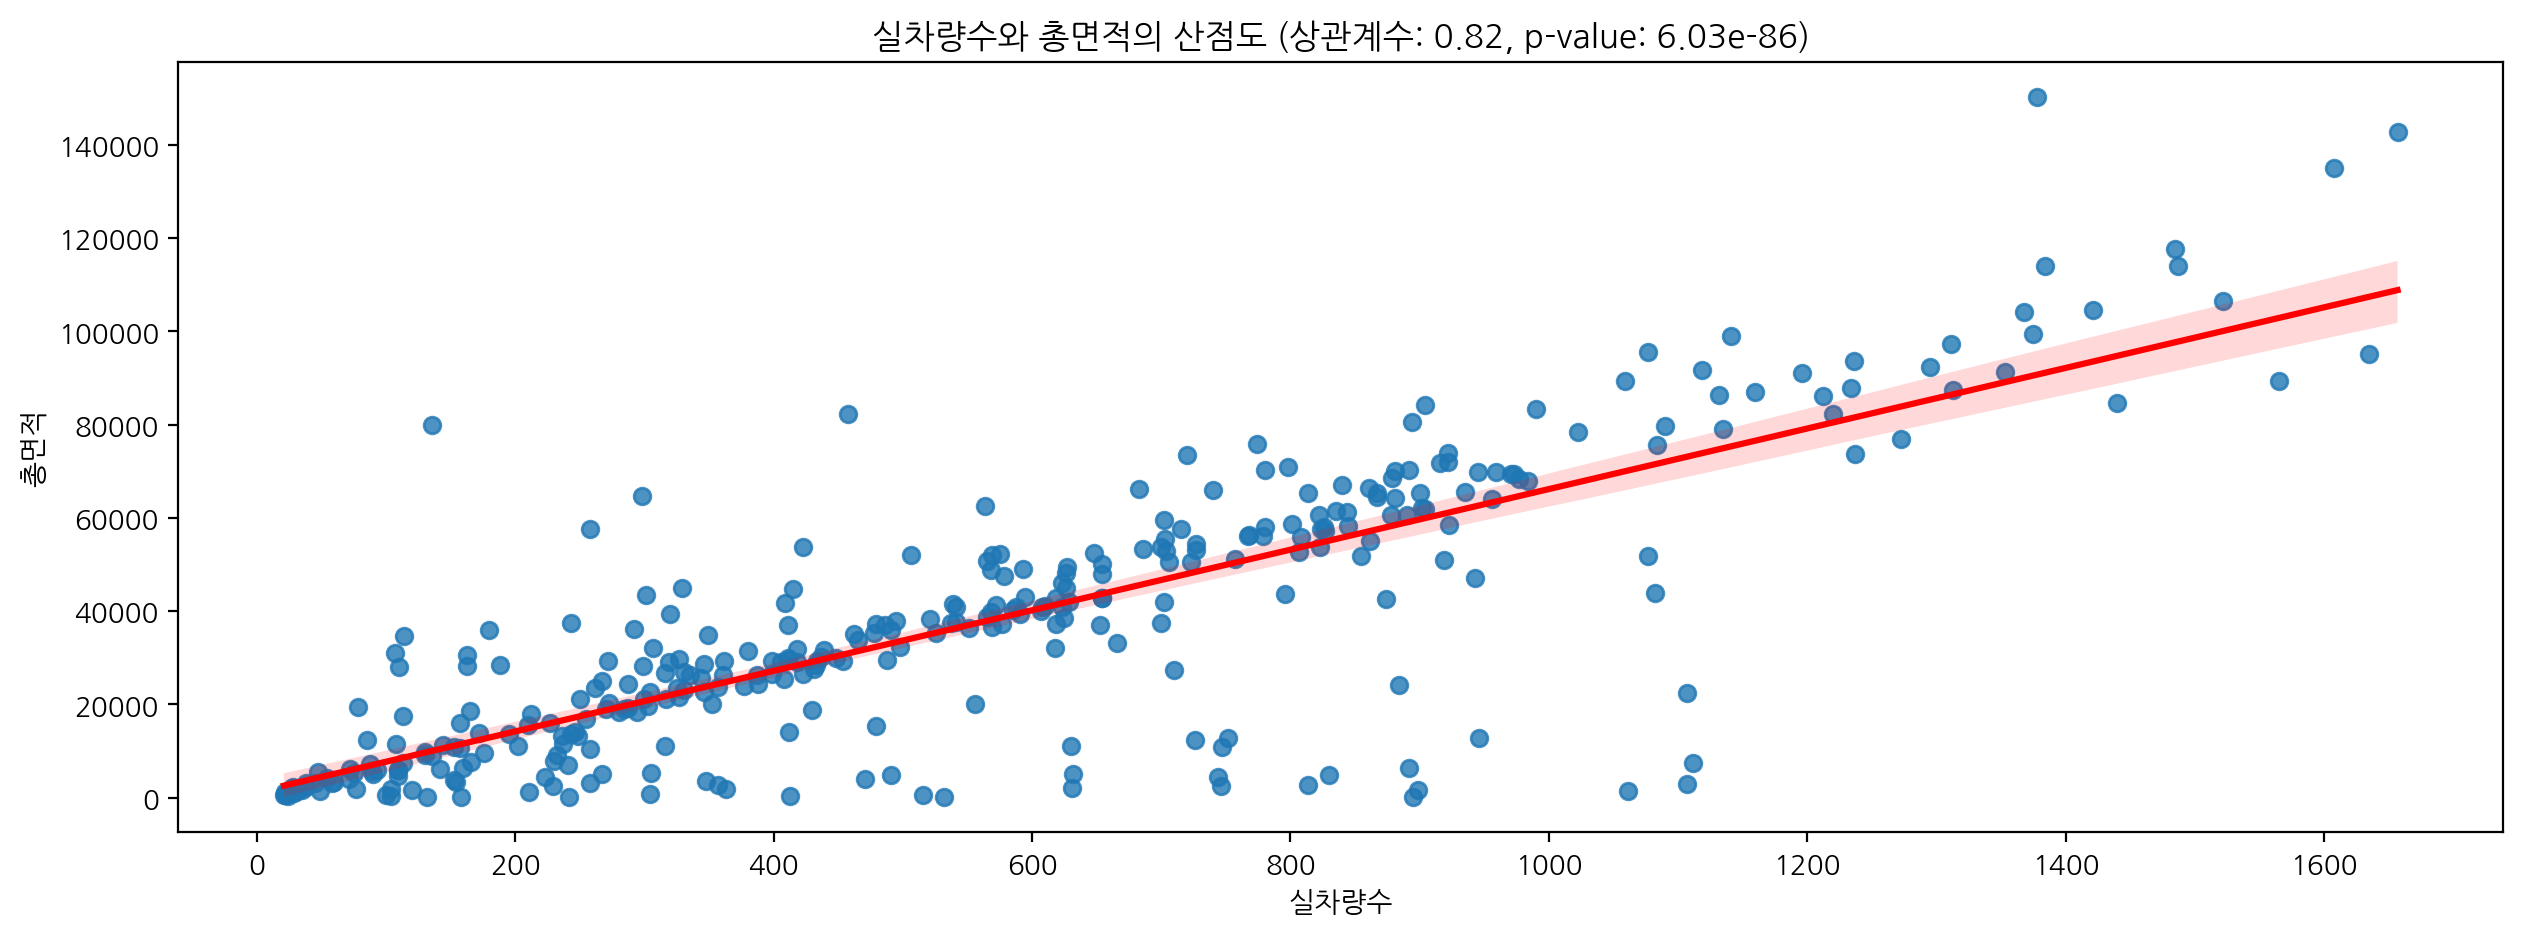

(0.8221825549027681, 6.032798759323943e-86)

In [117]:
plot_data_3(apart,'실차량수',corr_list[0])
# 총명적 피처 추가 때, 세대수를 곱한 값이기 때문에 총세대수와 비슷한 추세가 나타날 것으로 추정

#### 2) 변수이름

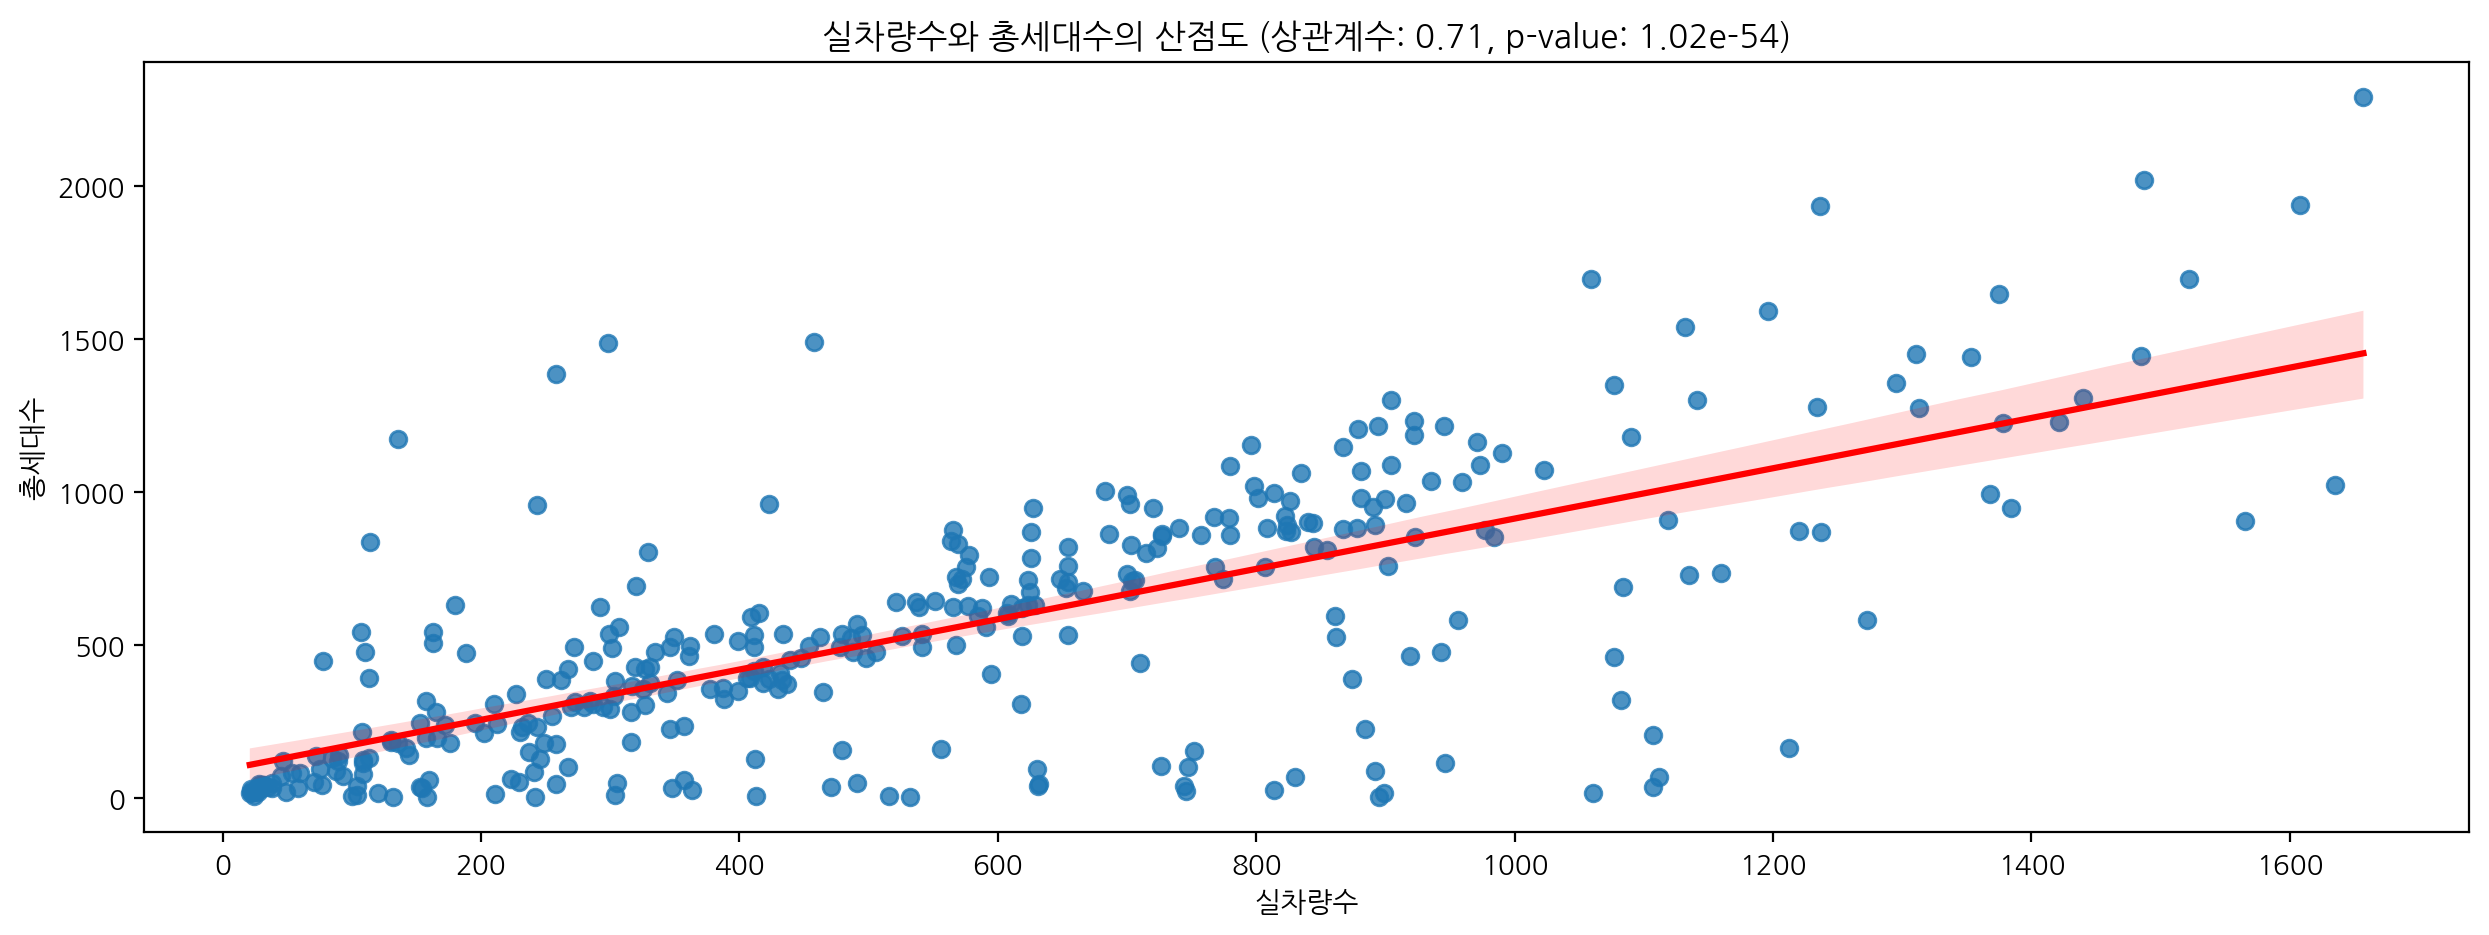

(0.7124746462088557, 1.0221045732952228e-54)

In [119]:
plot_data_3(apart,'실차량수',corr_list[1])
# 세대수가 많으면 사람 수도 많기때문에 실차량수도 많을 것으로 추정

#### 3) 변수이름

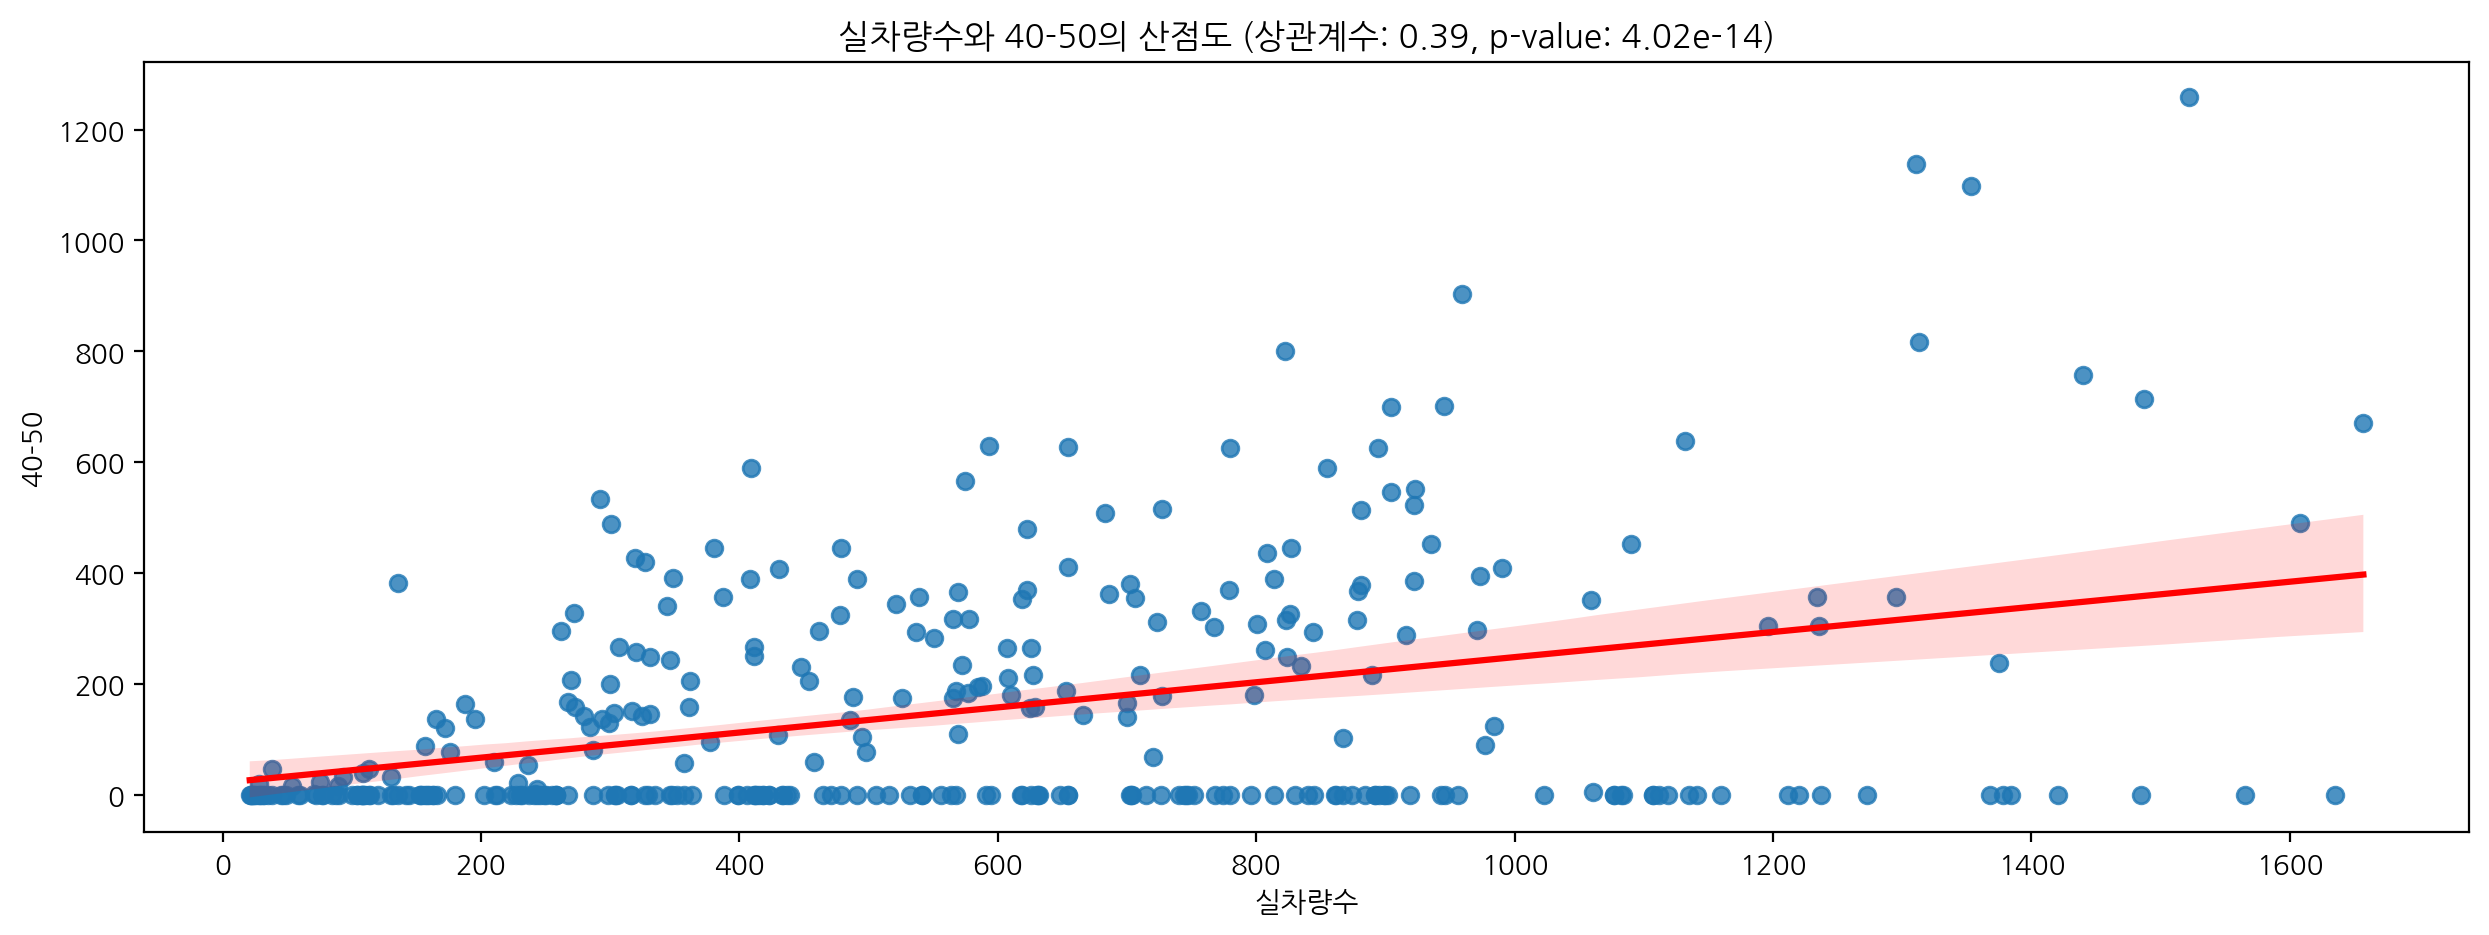

(0.39205541397151844, 4.0153412080284876e-14)

In [121]:
plot_data_3(apart,'실차량수',corr_list[2])
# 40-50 면적에 거주하는 주민들이 차량을 많이 소유한 것으로 추정

#### 4) 변수이름

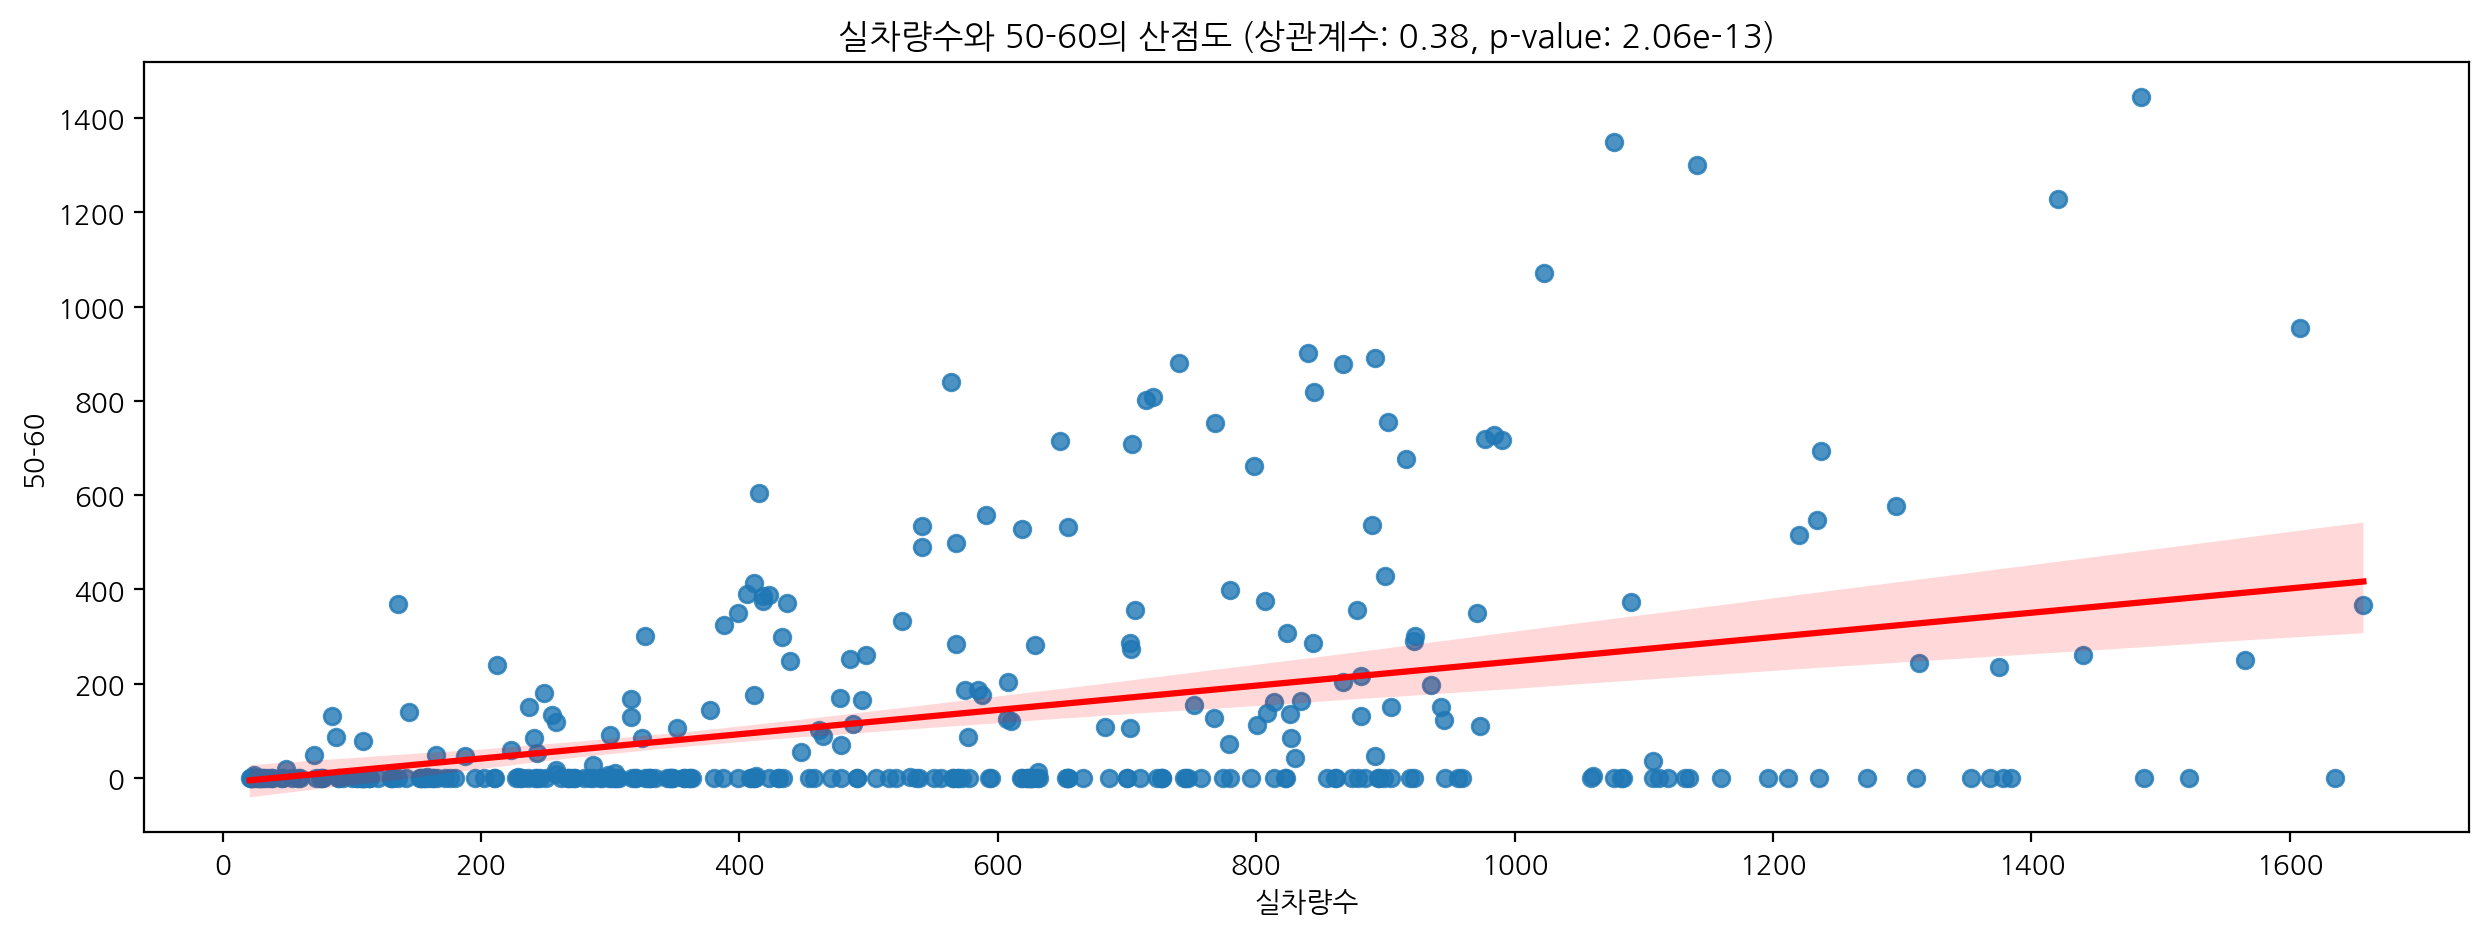

(0.3817459885595411, 2.0591125303787287e-13)

In [123]:
plot_data_3(apart,'실차량수',corr_list[3])
# 50-60 면적에 거주하는 주민들이 차량을 많이 소유한 것으로 추정

#### 5) 변수이름

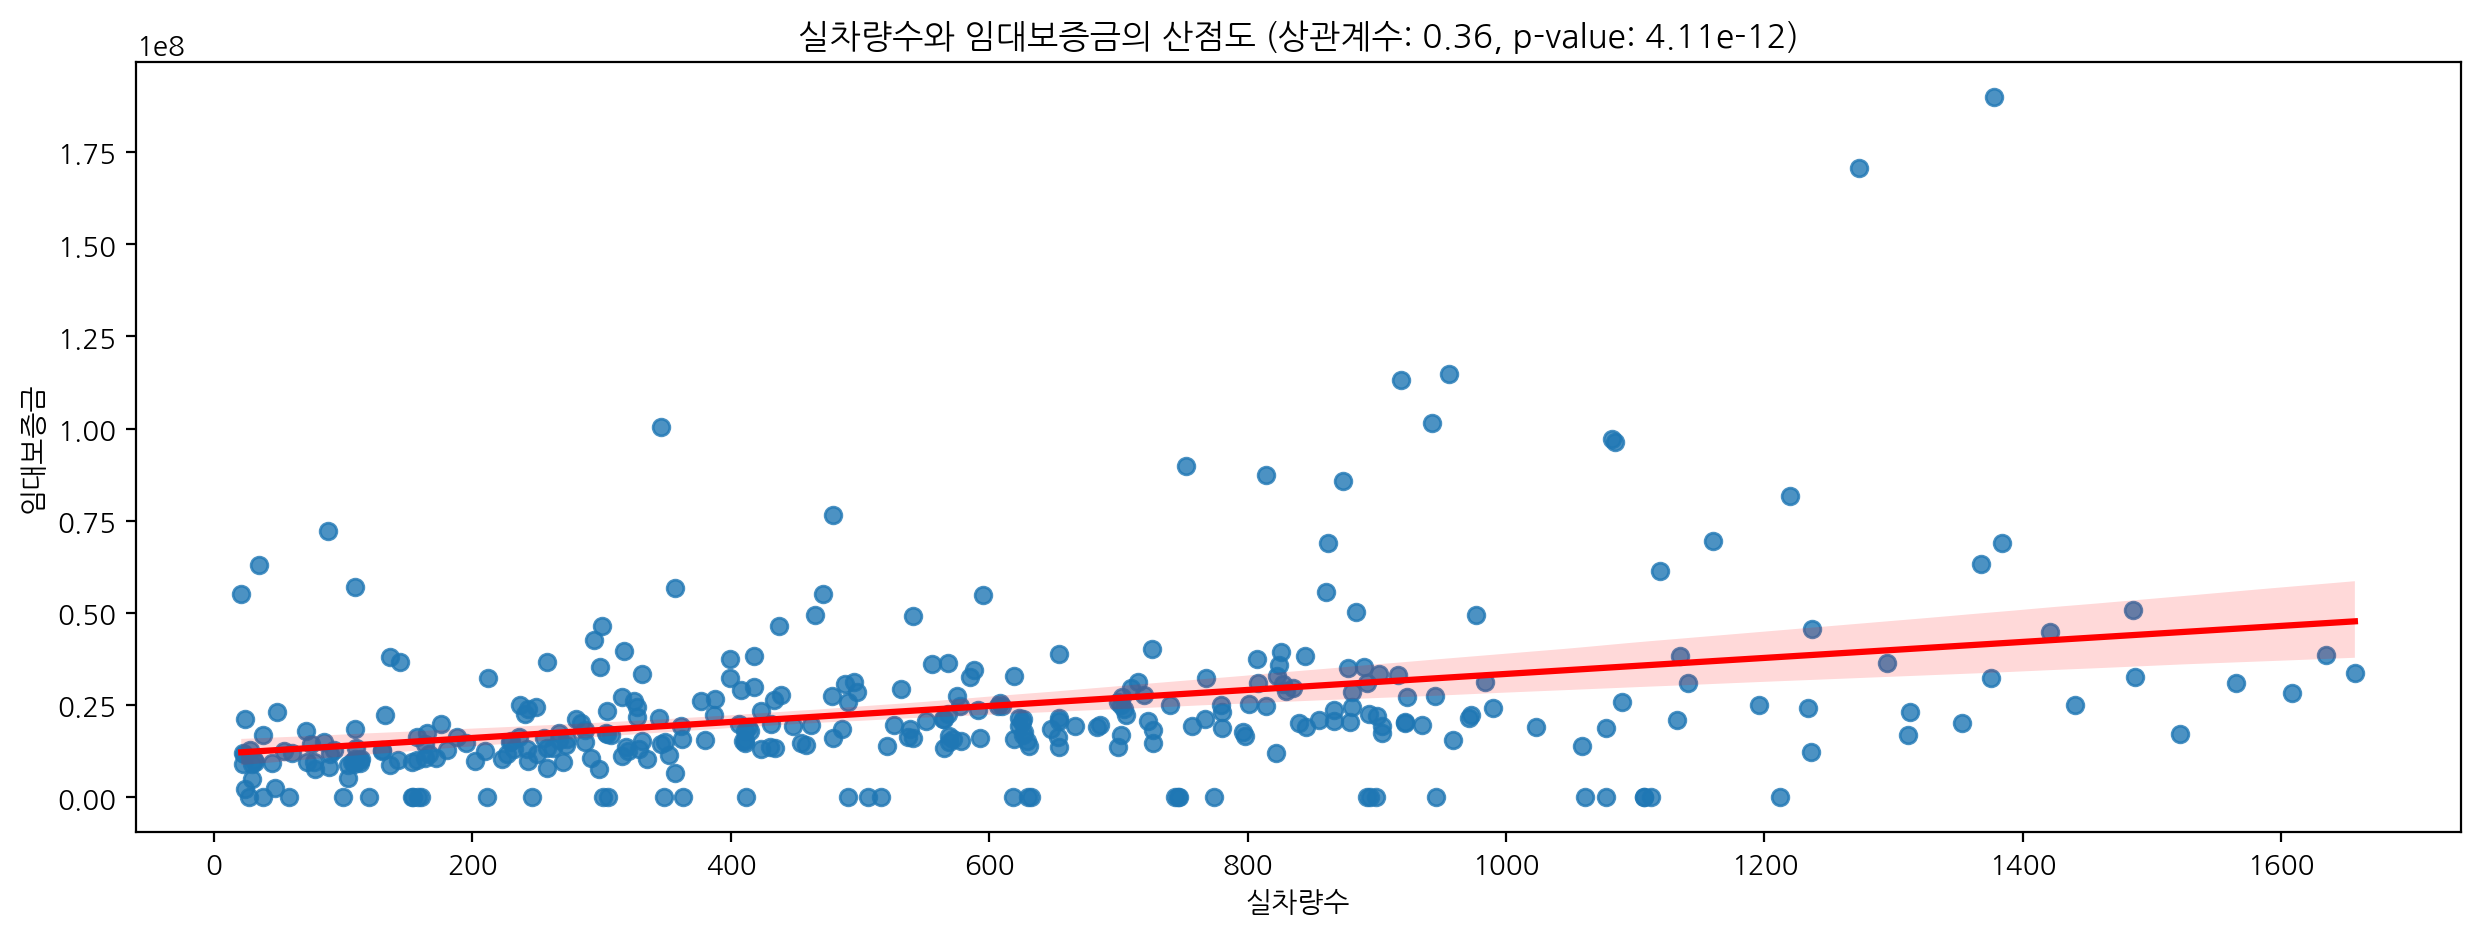

(0.3618671316644979, 4.109629446626115e-12)

In [125]:
plot_data_3(apart,'실차량수',corr_list[4])
# 보증금이 비쌀수록 총면적이 클 것으로 추정 = 총면적과 관련 있을 것으로 추정
# 보증금에 비해 실차량수가 낮은 것은 전세일 것으로 추정

### (3) 범주형 변수 → 실차량수

- 범주형 변수 → 실차량수 관계를 분석합니다.
- 대상: '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부'
- 범줏값 별 실차량수 평균을 막대그래프로 시각화해 분석합니다.
- 반복되는 코드는 함수를 만들어 사용하면 편리합니다.

In [391]:
columns_to_analyze = ['지역', '준공연도', '건물형태', '난방방식', '승강기설치여부']
def plot_category_mean(df, category_column, target_column):
    category_mean = df.groupby(category_column)[target_column].mean()
    plt.figure(figsize=(10, 6))
    category_mean.plot(kind='bar', color='skyblue')
    plt.title(f'Average {target_column} by {category_column}')
    plt.ylabel(f'Average {target_column}')
    plt.xlabel(category_column)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### 1) 지역

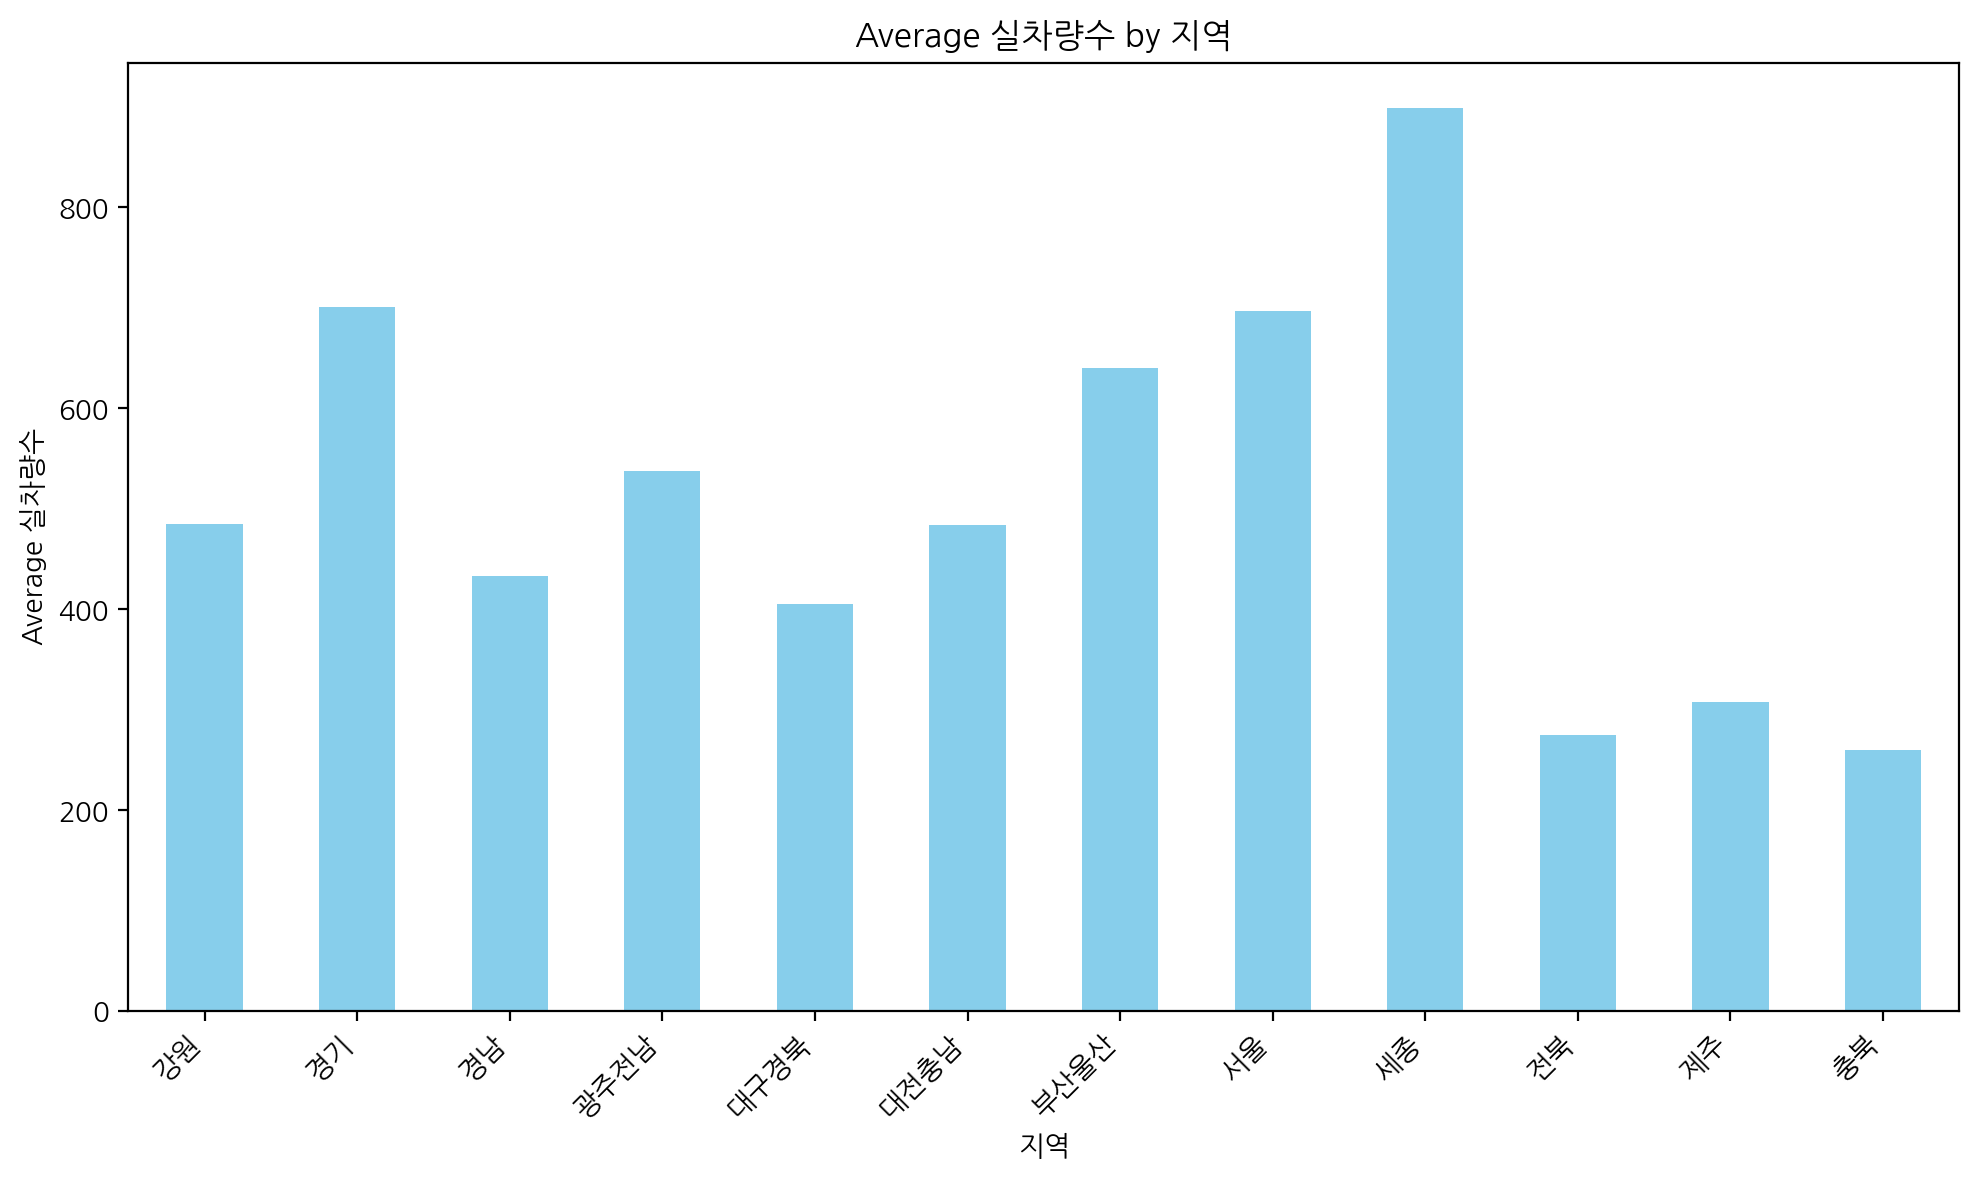

In [394]:
plot_category_mean(apart,columns_to_analyze[0] , '실차량수')
# 세종 경기 서울의 차량수가 높음 = 인구밀집도가 높다

#### 2) 준공연도

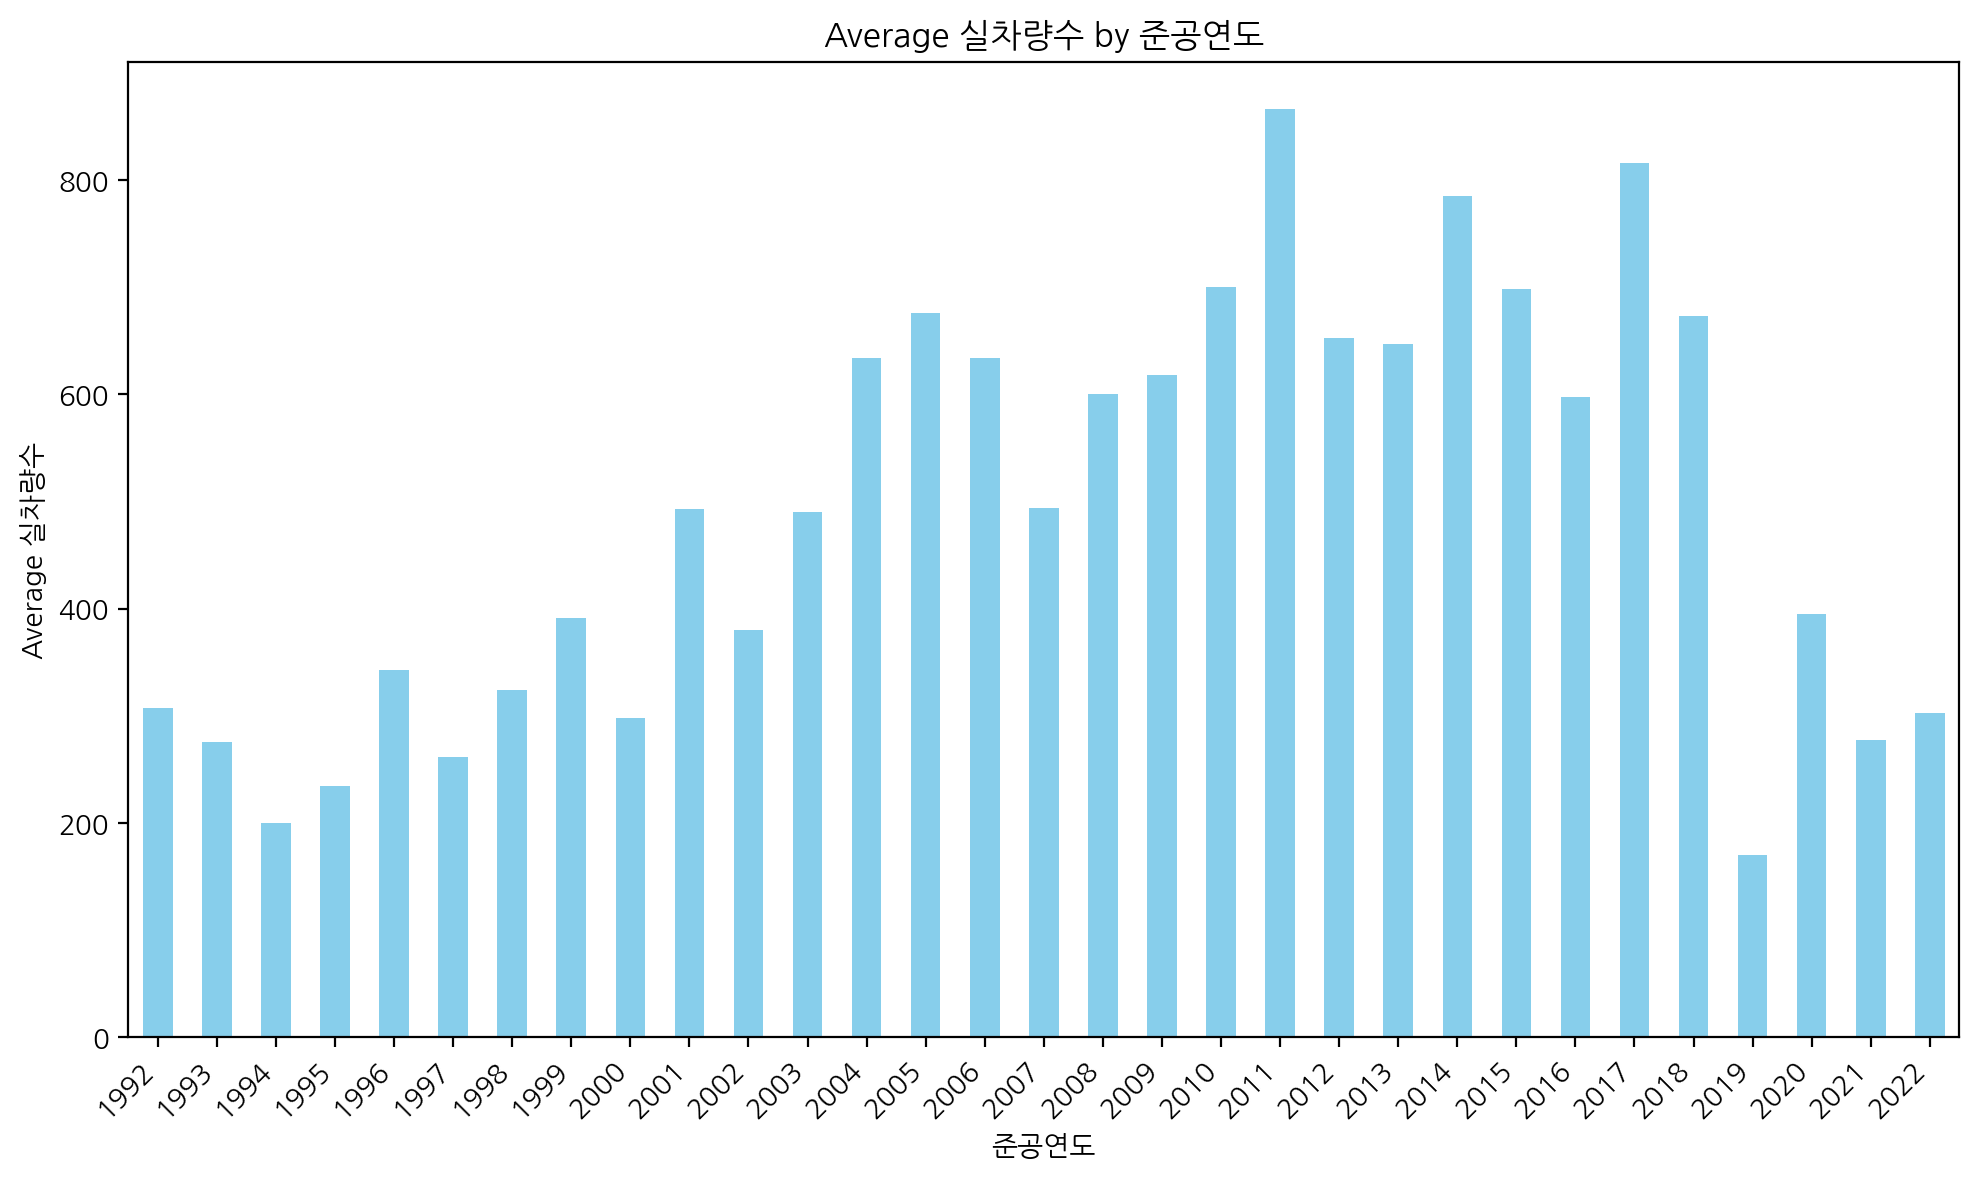

In [396]:
plot_category_mean(apart,columns_to_analyze[1] , '실차량수')
# 준공이 많이 된 만큼 실차량수도 증가

#### 3) 건물형태

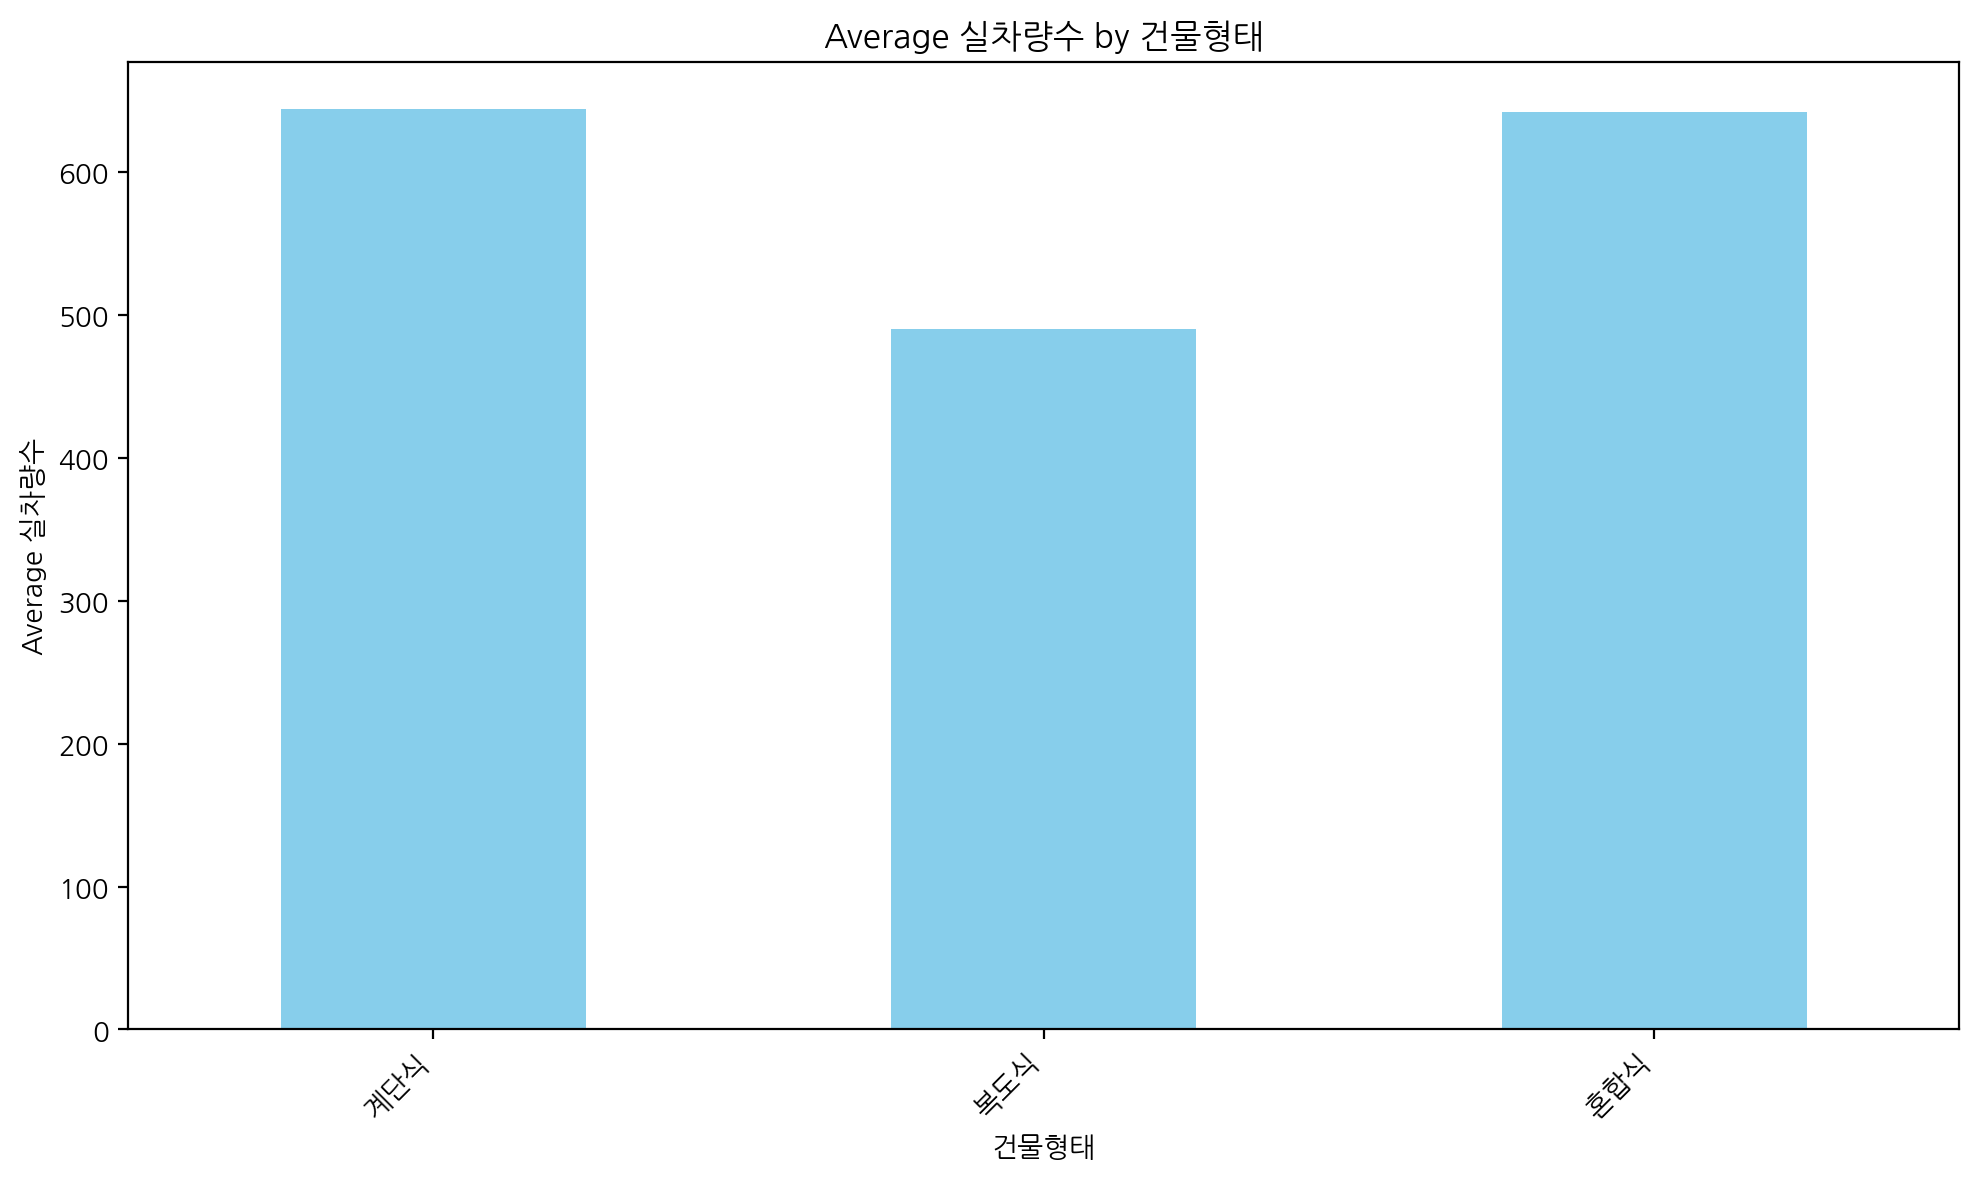

In [399]:
plot_category_mean(apart,columns_to_analyze[2] , '실차량수')
# 계단식 거주자의 경제력이 높은 것으로 추정 = 차량을 더 소유

#### 4) 난방방식

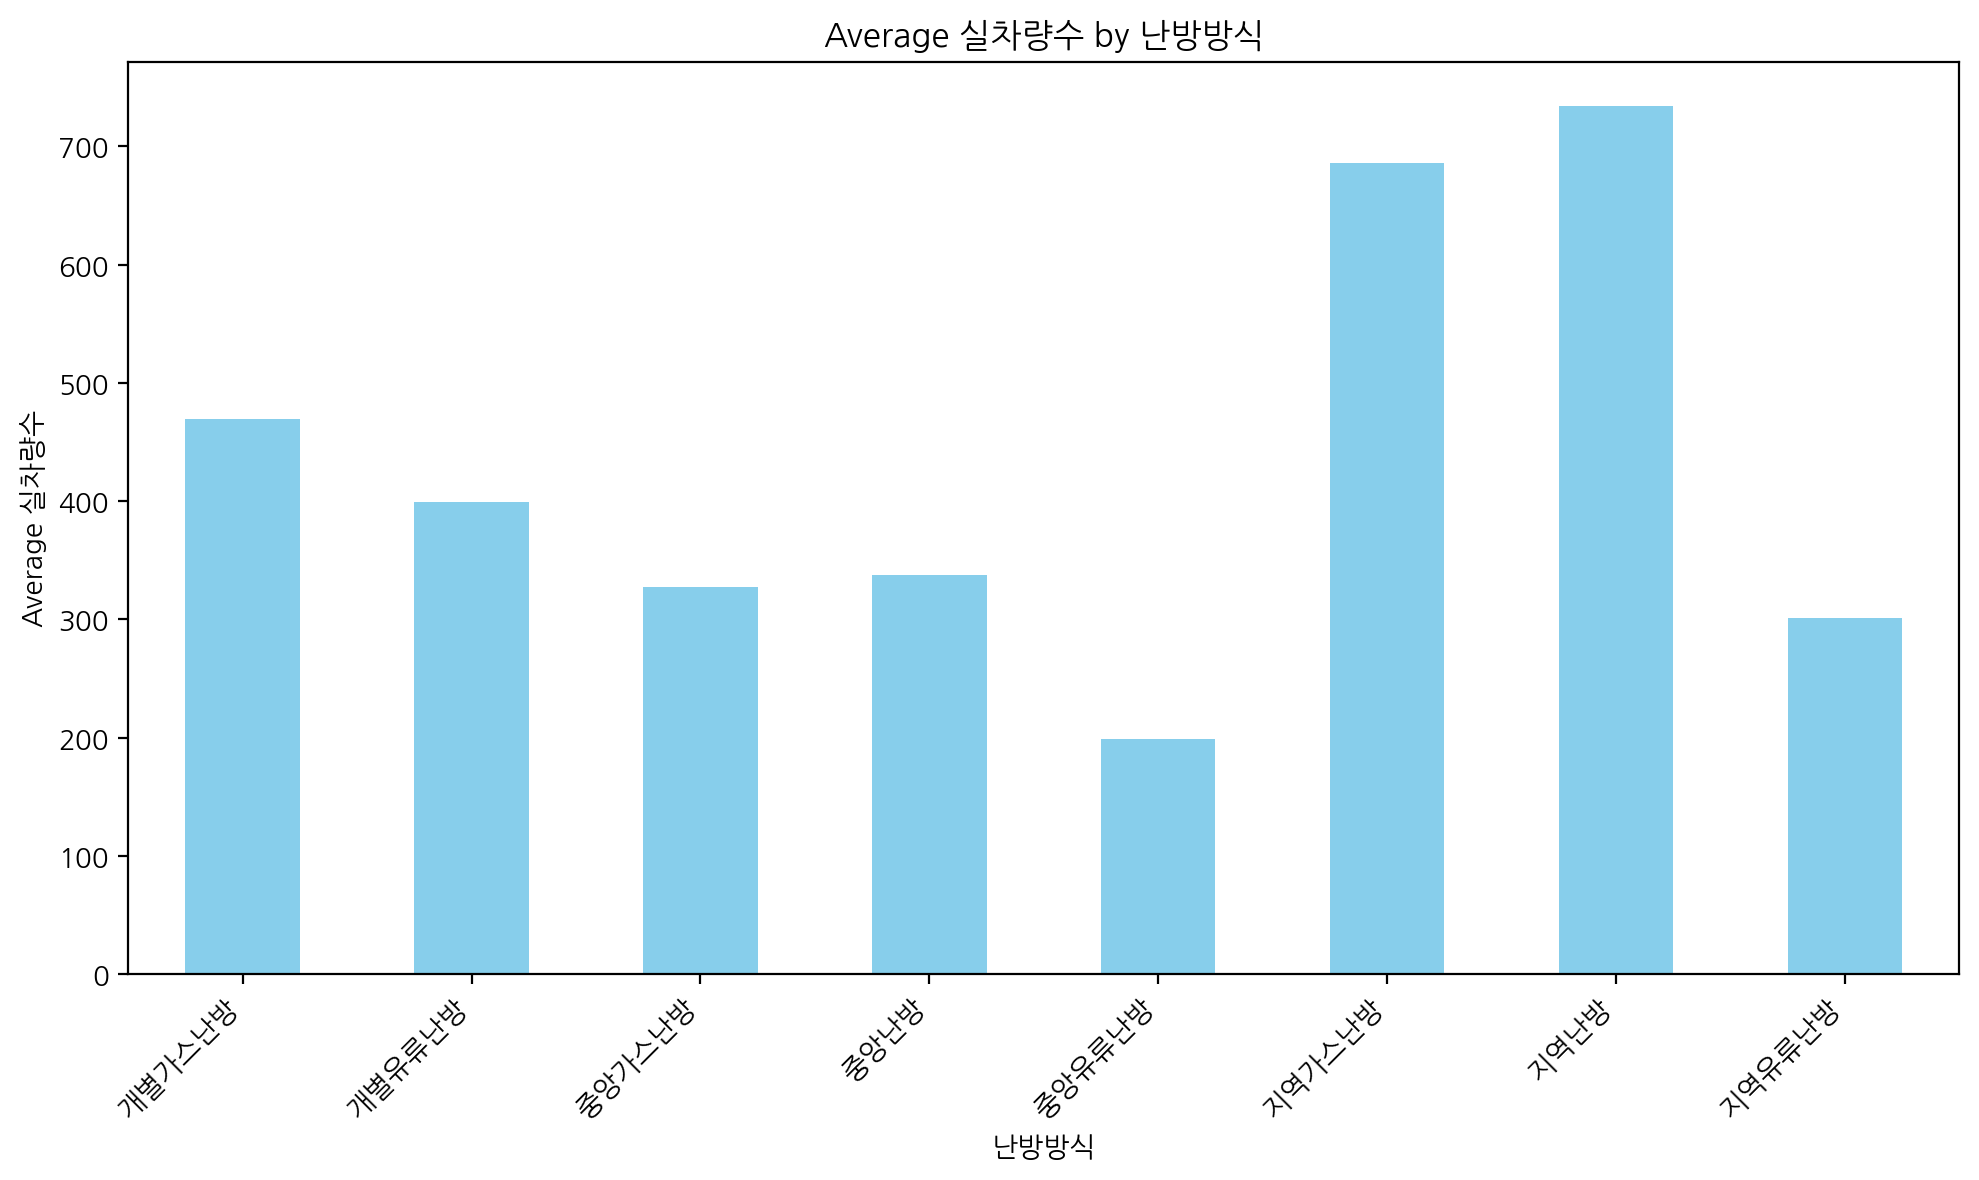

In [403]:
plot_category_mean(apart,columns_to_analyze[3] , '실차량수')
# 과거부터 지역 난방이 사용되어 사용 주민이 누적된 만큼 차량수가 많은 것으로 추정 

#### 5) 승강기설치여부

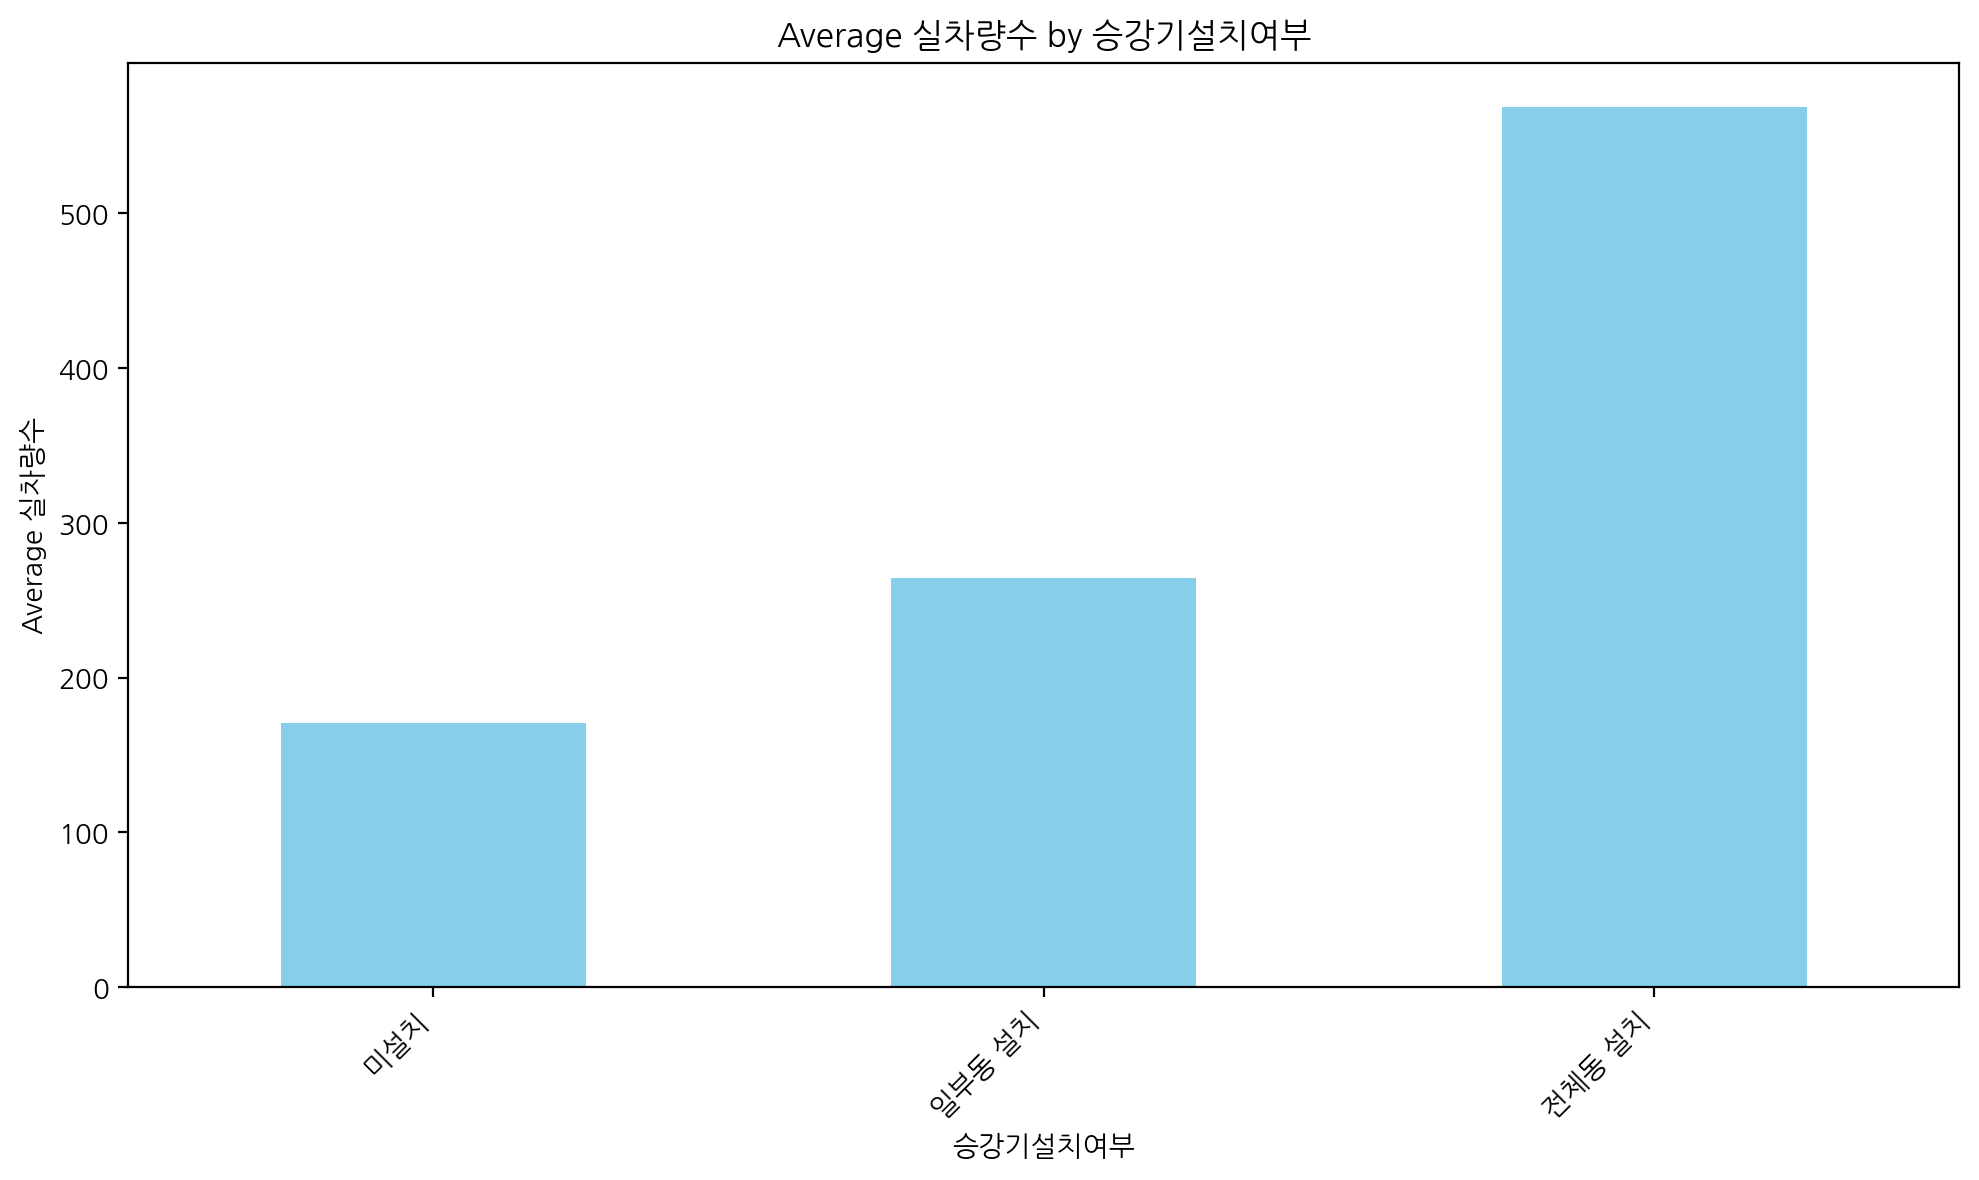

In [406]:
plot_category_mean(apart,columns_to_analyze[4] , '실차량수')
# 설치와 미설치 상관없이 차량을 많이 소유한 것으로 추정

### (4) 상관계수 분석
- One-way ANOVA를 통한 범주형 변수 → 실차량수 상관관계 분석

In [142]:
from scipy import stats
def perform_anova(data, category_col, numeric_col):
    groups = [data[data[category_col] == category][numeric_col] for category in data[category_col].unique()]
    f_val, p_val = stats.f_oneway(*groups)
    print(f'ANOVA 결과 - {category_col}에 따른 {numeric_col}:')
    print(f'F-value: {f_val}, P-value: {p_val}')
    print('-' * 40)
columns_to_analyze = ['준공연도', '건물형태', '난방방식', '승강기설치여부']
numeric_column = '실차량수'
for category in columns_to_analyze:
    perform_anova(apart, category, numeric_column)

#ANOVA: 범주형 변수와 수치형 변수 간의 관계를 분석
#One-way: 하나의 독립변수와 종속변수의 관계를 분석
#F-value는 그룹 간 차이가 있는지를 나타내며, F-value가 클수록 그룹 간 차이가 더 크다는 의미 
#P-value는 이러한 차이가 우연에 의한 것인지 아닌지를 나타내며, 일반적으로 P-value가 0.05 미만일 때 유의미한 차이라고 봄
#전체적으로 준공연도, 건물 형태, 난방 방식, 승강기 설치 여부 모두 실차량수에 유의미한 영향을 미치는 것으로 나타난다.

ANOVA 결과 - 준공연도에 따른 실차량수:
F-value: 3.3327632896638777, P-value: 5.420679676816041e-08
----------------------------------------
ANOVA 결과 - 건물형태에 따른 실차량수:
F-value: 7.320222554274251, P-value: 0.0007709615247838492
----------------------------------------
ANOVA 결과 - 난방방식에 따른 실차량수:
F-value: 26.26240461175856, P-value: 2.453328323357609e-11
----------------------------------------
ANOVA 결과 - 승강기설치여부에 따른 실차량수:
F-value: 12.469686307188878, P-value: 0.0004701259556938319
----------------------------------------


## 5. 추가 전처리

- '난방방식', '승강기설치여부' 두 변수에 대해서 적은 수의 범주로 묶는 작업을 진행합니다.
- '단지코드'는 개별적인 값이므로 예측과 관련이 없으니 제거합니다.
- '지역' 변수는 지역별 특성을 고려하기에는 너무 세분화 되어 있고, 특징으로 통합하기 어려우므로 제거합니다.

### (1) 난방방식

- '난방방식' 변수의 값을 다음과 같이 변경하여 세 개의 범줏값만 갖게 합니다.
    - 개별가스난방 → 개별
    - 개별유류난방 → 개별
    - 지역난방 → 지역
    - 지역가스난방 → 지역
    - 지역유류난방 → 지역
    - 중앙가스난방 → 중앙
    - 중앙난방 → 중앙
    - 중앙유류난방 → 중앙

In [415]:
# 사전에 작업 수행
# apart['난방방식'] = apart['난방방식'].str[:2]
# print(apart['난방방식'].value_counts())

난방방식
개별    192
지역    132
중앙     20
Name: count, dtype: int64


### (2) 승강기설치여부

- '승강기설치여부' 변수의 값을 다음과 같이 변경하여 0, 1 값을 갖게 합니다.
    - 전체동 설치 → 1
    - 일부동 설치 → 0

    - 미설치 → 0

In [461]:
# 사전에 작업 수행
# apart['승강기설치여부'] = apart['승강기설치여부'].replace({
#     '전체동 설치': '1',
#     '일부동 설치': '0',
#     '미설치': '0',
# })
# print(apart['승강기설치여부'].value_counts())

난방방식
개별    192
지역    132
중앙     20
Name: count, dtype: int64
승강기설치여부
1    333
0     12
Name: count, dtype: int64


### (3) 단지코드, 지역 제거

- '단지코드', '지역' 변수를 제거합니다.

In [132]:
apart=apart.drop(['단지코드','지역'],axis=1)

- 최종 데이터를 확인합니다.

In [134]:
apart

,총세대수,준공연도,건물형태,난방방식,승강기설치여부,실차량수,총면적,10-30,30-40,40-50,50-60,60-70,70-80,80-200,임대보증금,임대료
0,78,2013,계단식,개별,1,109,6023.7683,0,0,0,78,0,0,0,5.696200e+07,642930.000000
1,35,2013,복도식,개별,1,35,1569.1668,35,0,0,0,0,0,0,6.306200e+07,470100.000000
2,88,2013,계단식,개별,1,88,7180.1396,0,0,0,88,0,0,0,7.219000e+07,586540.000000
3,477,2014,복도식,지역,1,943,47058.9273,0,0,0,150,0,216,111,1.015167e+08,950305.000000
4,15,2013,복도식,개별,1,21,543.0268,15,0,0,0,0,0,0,5.522750e+07,340148.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1485,1993,복도식,중앙,1,298,64622.2500,1181,298,0,6,0,0,0,7.595571e+06,104975.714286
341,1386,1993,복도식,중앙,1,258,57616.8100,1071,298,0,17,0,0,0,8.092875e+06,111848.750000
342,956,1994,복도식,지역,1,243,37398.7200,956,0,0,0,0,0,0,9.931000e+06,134540.000000
343,120,2020,복도식,개별,1,47,5581.8024,66,54,0,0,0,0,0,2.515500e+06,50040.000000


## 6. 데이터 셋 저장

- joblib.dump() 함수를 사용하여 최종 데이터 셋을 파일로 저장합니다.
- 파일 이름은 base_data2.pkl로 합니다.

In [136]:
# 파일로 저장
joblib.dump(apart, path+'base_data2.pkl')

['base_data2.pkl']